# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**В ходе данного исследования будут проанализированы данные о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет, а именно с ноября 2014 по май 2019 года. Будет изучено предложение на рынке недвижимости, определены параметры, влияющие на ценообразование, будут выделены аномалии и проанализирована ситуация на рынке в целом.**

* [Шаг 1. Откройте файл с данными и изучите общую информацию.](#step1)
* [Шаг 2. Предобработка данных](#step2)
* [Шаг 3. Посчитайте и добавьте в таблицу](#step3)
* [Шаг 4. Проведите исследовательский анализ данных и выполните инструкции](#step4)
* [Шаг 5. Общий вывод](#step5)

 ### Шаг 1. Откройте файл с данными и изучите общую информацию. <a class="anchor" id="step1"></a>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
pd.set_option('display.max_columns', None)
import datetime as dt

In [16]:
df = pd.read_csv('../datasets/real_estate_data.csv', sep='\t')

In [17]:
display(df.sample(5).T)
df.info()

,8826,9144,18248,20273,3767
total_images,20,13,15,12,8
last_price,3550000.0,5400000.0,4900000.0,20000000.0,4630000.0
total_area,47.0,63.0,42.4,460.8,45.0
first_day_exposition,2017-06-02T00:00:00,2017-07-12T00:00:00,2019-04-04T00:00:00,2019-03-20T00:00:00,2018-02-25T00:00:00
rooms,1,3,1,6,2
ceiling_height,NaN,2.5,2.7,3.1,NaN
floors_total,15.0,12.0,23.0,3.0,9.0
living_area,19.0,43.0,18.0,279.6,27.0
floor,11,10,20,1,9
is_apartment,NaN,NaN,False,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


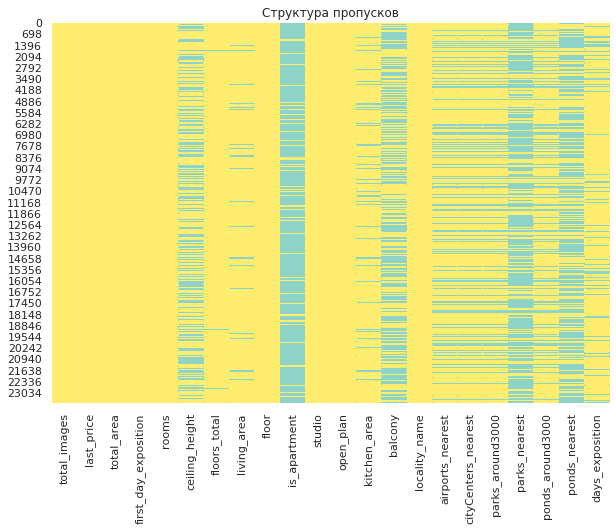

In [4]:
plt.figure(figsize=(10, 7)) #Визуализация структуры пропусков
sns.heatmap(df.isnull(), cmap='Set3_r', cbar=False)
plt.title('Структура пропусков')
plt.show()

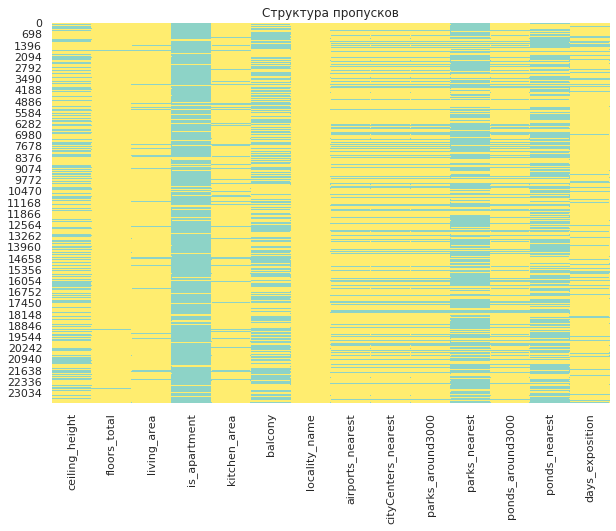

In [5]:
problem_columns = df.columns[df.isnull().sum() > 0]
plt.figure(figsize=(10, 7)) #Визуализация структуры пропусков
sns.heatmap(df[problem_columns].isnull(), cmap='Set3_r', cbar=False)
plt.title('Структура пропусков')
plt.show()

Построив визуализацию структуры пропусков мы обнаружили,что в столбцах с пропусками есть общие столбцы с пропусками. Итак, в датасете следующие столбцы не имеют пропусков в данных: total_images(число фотографий квартиры в объявлении), last_price(цена на момент снятия с публикации), total_area(площадь квартиры в квадратных метрах (м²)), first_day_exposition(дата публикации),rooms(число комнат), floor(этаж), studio(квартира-студия (булев тип)), open_plan(свободная планировка (булев тип)). Можно предположить, что это - обязательные поля для заполнения пользователей при публикации объявлений. Остальные данные можно указывать опционально, либо  же они получены автоматически на основе картографических данных.

### Вывод

При выводе таблицы обнаружилось, что данные склеины в одну строку, из-за чего информация была нечитаемой, но указав как разделитель знак табуляции: '\t', мы сделали так, что колонки стали разбиваться для комфортного анализа.

Вызвав метод info(), мы увидели данные какого типа содержатся в нашем датасете.

### Шаг 2. Предобработка данных  <a class="anchor" id="step2"></a>

Пропущенные значения обнаружены в следующих столбцах:
- ceiling_height (высота потолков (м))
- floors_total(всего этажей в доме)
- living_area (жилая площадь в квадратных метрах(м²))
- is_apartment (апартаменты (булев тип))
- kitchen_area (площадь кухни в квадратных метрах (м²))
- balcony (число балконов)
- locality_name (название населённого пункта)          
- airports_nearest (расстояние до ближайшего аэропорта в метрах (м))      
- cityCenters_nearest (расстояние до центра города (м))     
- parks_around3000 (число парков в радиусе 3 км)     
- parks_nearest (расстояние до ближайшего парка (м))          
- ponds_around3000 (число водоёмов в радиусе 3 км)       
- ponds_nearest (расстояние до ближайшего водоёма (м))           
- days_exposition (сколько дней было размещено объявление (от публикации до снятия))

Заполнение значений Nan на 0, т.к.если не указано количество балконов, парков и водоемов поблизости, их скорее всего нет.

In [6]:
df['balcony'] = df.fillna(0)
df['parks_around3000'] = df.fillna(0)
df['ponds_around3000'] = df.fillna(0)

In [7]:
df.dropna(subset = ['floors_total'], inplace=True) 
print(df['floors_total'].unique())

[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. 20. 28. 36. 21. 35. 34. 60.  1. 29. 33. 52. 37.]


Поскольку пропущенных значений в столбце floors_total(всего этажей в доме)не так много - 86, можно удалить данные строчки не сильно повлияв на результат.


Вычислим цену за один квадратный метр чтобы в дальнейшем поделить все квартиры по ценовой категории.

In [8]:
df['price_per_meter2'] = (df['last_price'] / df['total_area']).round(3)#Вычисление цены за квадратный метр


In [9]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter2
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,20,Санкт-Петербург,18863.0,16028.0,20,482.0,20,755.0,NaN,120370.370
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,7,посёлок Шушары,12817.0,18603.0,7,NaN,7,NaN,81.0,82920.792
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,10,Санкт-Петербург,21741.0,13933.0,10,90.0,10,574.0,558.0,92785.714
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,0,84.0,0,234.0,424.0,408176.101
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,2,Санкт-Петербург,31856.0,8098.0,2,112.0,2,48.0,121.0,100000.000


Построим графики для рассмотрения распределения цен на квадратный метр

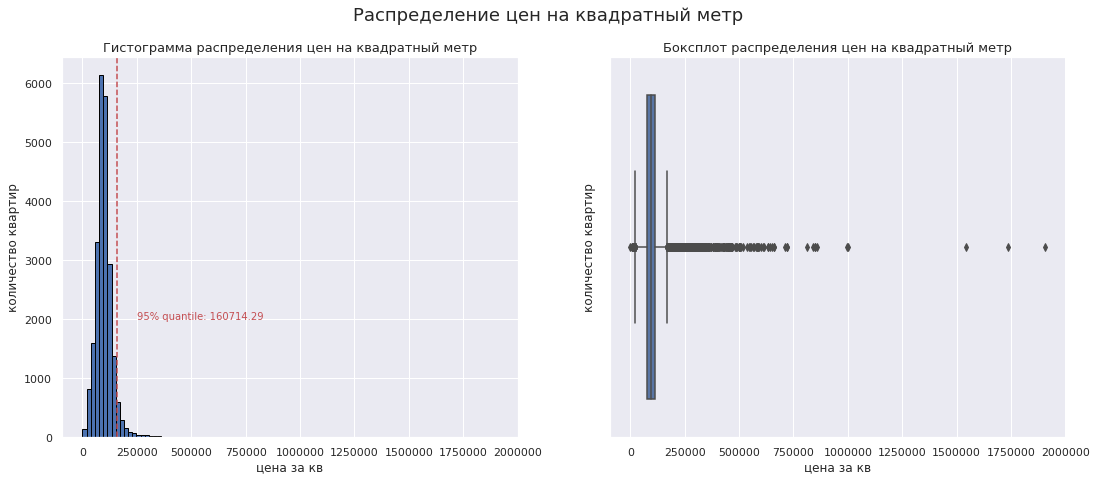

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7))
plt.suptitle('Распределение цен на квадратный метр', size=18)

#Построение гистограммы
df['price_per_meter2'].hist(bins=100, edgecolor='black', ax=axs[0])
axs[0].set_title('Гистограмма распределения цен на квадратный метр', size=13)
axs[0].set_xlabel('цена за кв')
axs[0].set_ylabel('количество квартир')
axs[0].axvline(x=df['price_per_meter2'].quantile(.95), c='r', linestyle='--')
axs[0].text(s='95% quantile: {:.2f}'.format(df['price_per_meter2'].quantile(.95)), 
          x=250e3, y=2000, size=10, color='r')
#Построение боксплота
sns.boxplot(x='price_per_meter2', data=df, ax=axs[1])
axs[1].set_title('Боксплот распределения цен на квадратный метр', size=13)
axs[1].set_xlabel('цена за кв')
axs[1].set_ylabel('количество квартир')

plt.show()


Рассчитав медиану и построив диаграмму мы видим, что распределение похоже на Пуассоновское -  гистограмма с длинным хвостом на высоких значениях и падением в ноль слева от пика, не доходя до нулевого значения. 95 % квантиль составляет 160714.29, квартиры с ценой сыше этого значения занесены в дальнейшем в отдельную группу из-за непомерно высоких зачений, которые будем считать аномалиями. На боксплоте они отражены как выбросы.

Поделим значения в столбце "цена за квадратный метр" на группы в зависимости от цены для того чтобы впоследствии использовать категории для группировки по ним.

In [11]:
df['price_per_m_group'] = pd.qcut(df['price_per_meter2'], q=[0, 0.25, 0.5, 0.75, 0.95, 1], 
                                  labels=['нищета и страдание', 'эконом','бизнес', 'люкс', 'золото и жир'])


In [12]:
# Заполнение пропусков в столбце "высота потолков"
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby(['floors_total','price_per_m_group'])['ceiling_height'].
                                                   transform('median'))
#Построение сводной таблицы по высоте потолков
df.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'min', 'max'])


,median,min,max
,ceiling_height,ceiling_height,ceiling_height
floors_total,,,
1.0,2.900,2.30,3.00
2.0,2.700,1.20,27.00
3.0,2.950,2.50,32.00
4.0,3.000,2.40,27.00
5.0,2.645,2.00,100.00
6.0,3.000,2.40,32.00
7.0,2.920,2.45,6.00
8.0,2.700,2.40,5.20


Используя группировку по количеству этажей в доме и по цене за квадратный метр мы заполнили пропущенные значения в столбце "высота потолков", исходя из логики, что высота потолков зависит во-первых, от цены квартиры, а во-вторых от этажности дома: высотки имеют более высокие потолки, точно так же как и более дорогие квартиры.

In [18]:
#Не все строки заполнились медианой, посчитаем кол-во незаполненных значений 
print('Количество незаполненных значений:', len(df[df['ceiling_height'].isnull()]))

Количество незаполненных значений: 9195


Не все пустые строчки заполнились медианой,что может говорить о некачественных данных и о том, что пустые значения накладываются друг на друга не позволяя рассчитать медиану для заполнения пропусков. 

Группируя данные по цене за квадратный метр и высотности здания мы заполнили пропуски в столбце "ceiling_height" (высота потолков (м)). Получили аномально высокие и аномально низкие значения высоты потолков в некоторых местах. Заменим их медианой, считая, что аномально высокие значения: больше 10 м, а аномально низкие: меньше 2 м.

In [14]:
#Замена аномалий медианными значениями
df.loc[df['ceiling_height'] < 2, 'ceiling_height'] = df['ceiling_height'].median()
df.loc[df['ceiling_height'] > 10, 'ceiling_height'] = df['ceiling_height'].median()
table = df.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'min', 'max'])

Построим график чтобы посмотреть изменения, произошедшие после замены аномальных значений медианой.

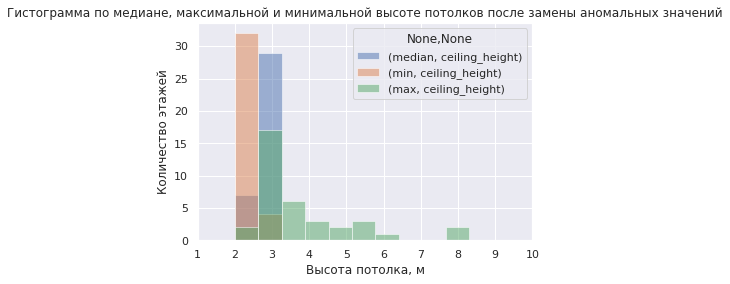

In [15]:
table.plot(kind='hist', stacked=False, bins=10, alpha=0.5)
plt.title('Гистограмма по медиане, максимальной и минимальной высоте потолков после замены аномальных значений')
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество этажей')
plt.xlim(1, 10)
plt.show()
# https://pandas.pydata.org/pandas-docs/version/0.16.0/visualization.html

Из гистограммы видим, что мы убрали все значения высоты потолков меньше 2 м и больше 10 м. Наибольшее число медианных значений находится в диапазоне 2.5-3.5 м в многоэтажках свыше 25 этажей.

In [16]:
df['living_area'] = df['living_area'].fillna(df.groupby(['total_area', 'rooms'])['living_area'].transform('median')) 
#Заполнение пропусков в переменной жилая площадь медианой 

In [17]:
#Построение сводной таблицы по средней цене за кв.м. с разбиением на группы
df['is_apartment1'] = df['is_apartment']
df_pivot_apartment = df.pivot_table(index='price_per_m_group', columns='is_apartment', values='is_apartment1', 
                                    aggfunc='count')
df_pivot_apartment['ratio'] = df_pivot_apartment[1] / (df_pivot_apartment[0] + df_pivot_apartment[1])
display(df_pivot_apartment)

is_apartment,False,True,ratio
price_per_m_group,,,
нищета и страдание,745,8,0.010624
эконом,688,6,0.008646
бизнес,642,11,0.016845
люкс,525,14,0.025974
золото и жир,125,11,0.080882


Построив сводную таблицу по имеющимся значениям, чтобы увидеть соотношение апартаментов к не апартаментам мы увидели, что почти по всем ценовым категориям квартир количество апартаментов составляет не более 8%. Предположим, что если нет пометки, что квартира - это апартаменты, то значение равно 0.

In [18]:
df['is_apartment'] = df['is_apartment'].fillna(0)

In [19]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby(['total_area', 'living_area', 'rooms'])['kitchen_area'].transform('median'))

Для того чтобы заполнить пропуски в колонке площадь кухни в квадратных метрах (м²) мы нашли медиану, группируя данные по жилой площади, общей площади и количеству комнат.

In [20]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df.groupby(['locality_name', 'parks_nearest', 'ponds_nearest'])['cityCenters_nearest'].transform('median'))

Для того чтобы заполнить пропуски в колонке расстояние до центра города (м) мы нашли медиану, группируя данные по  названию населённого пункта, расстоянию до ближайшего водоёма (м)  и расстоянию до ближайшего парка (м).

Заполнение пропусков дало результат, представленный ниже. Мы избавились не от всех пустых значений, но постарались минимизировать пропуски.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 25 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23387 non-null float64
floors_total            23613 non-null float64
living_area             23414 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null object
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            22702 non-null float64
balcony                 23613 non-null object
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        23613 non-null object
parks_nearest           8045 non-null float64
ponds_around3000

Переводим данные с плавающей точкой в формат int, поскольку в жизни мы не встречаем дробных этажей или комнат, поэтому логичнее перевести данные столбцы в целочисленный формат.

In [22]:
df['rooms'] = df['rooms'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')


Поскольку переменная "сколько дней было размещено объявление" независима от других переменных, заполнение пропусков медианой только исказит данные,поэтому было принято решение обозначить пропуски маркером -1, что позволит перевести дни в целочисленный формат. В дальнейшем при необходимости возможно будет избавиться от маркера и снова заполнить пустыми значениями.

In [23]:
df['days_exposition'] = df['days_exposition'].fillna(-1)
df['days_exposition'] = df['days_exposition'].astype('int')


In [24]:
df['is_apartment'] = df['is_apartment'].astype('bool')#Перевод переменной из типа object в булев тип

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 25 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23387 non-null float64
floors_total            23613 non-null int64
living_area             23414 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            22702 non-null float64
balcony                 23613 non-null object
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        23613 non-null object
parks_nearest           8045 non-null float64
ponds_around3000    

<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
 
Мы производим замену типов данных ради экономии памяти и соответственно повышения быстродействия.

int не хранит информацию о части после запятой, потому занимает меньше места, чем float, но это не предел :) Давай я дам тебе две классные статьи, а ты попробуешь изменить типы данных на самые подходящие и замеришь, сколько памяти в % ты сэкономишь:
    
https://pyprog.pro/data_types.html
    
https://habr.com/ru/company/ruvds/blog/442516/

<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Все сделала) Спасибо за ссылки!
</div>

<div class="alert alert-block alert-success">

инты и флоаты можно было использовать более экономные (значения у нас логически ограничены и могут быть только положительными)

In [26]:
#Просмотр сколько памяти занимает обработка
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 25 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23387 non-null float64
floors_total            23613 non-null int64
living_area             23414 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            22702 non-null float64
balcony                 23613 non-null object
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        23613 non-null object
parks_nearest           8045 non-null float64
ponds_around3000    

Получили результат 10.3 MB. Попробуем оптимизировать.

In [27]:
#Создание категориального листа для перевода столбцов из типа данных object в тип данных category для оптимизации работы кода
cat_list = ['balcony', 'locality_name', 'parks_around3000', 'ponds_around3000']

In [28]:
df[cat_list] = df[cat_list].astype('category') #Перевод столбцов из типа данных object в  тип category

In [29]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 25 columns):
total_images            23613 non-null int64
last_price              23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null object
rooms                   23613 non-null int64
ceiling_height          23387 non-null float64
floors_total            23613 non-null int64
living_area             23414 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            22702 non-null float64
balcony                 23613 non-null category
locality_name           23565 non-null category
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        23613 non-null category
parks_nearest           8045 non-null float64
ponds_around30

Нам удалось оптимизировать используемую память до 5.6 MB, почти в 2 раза.

### Вывод

- В данном блоке мы определили какие существуют пропущенные значения в нашем датасете, заполнили нулями очевидные пропуски: количество балконов, прудов и парков поблизости. 
- Поделили все квартиры на ценовые категории:'нищета и страдание', 'эконом','бизнес', 'люкс', а также определили аномальные значения и определили их в отдельную группу 'золото и жир'.
- Используя группировку по количеству этажей в доме и по цене за квадратный метр мы заполнили пропущенные значения в столбце "высота потолков", исходя из логики, что высота потолков зависит во-первых, от цены квартиры, а во-вторых от этажности дома: высотки имеют более высокие потолки, точно так же как и более дорогие квартиры. Высоту впоследствии пришлось заменять медианой, поскольку были пулучены аномально высокие или аномально низкие значения - меньше 2 м и больше 10 м, что в принципе невозможно в реальной жизни.
- Для того чтобы заполнить пропуски в колонке площадь кухни в квадратных метрах (м²) мы нашли медиану, группируя данные по жилой площади, общей площади и количеству комнат.
- Построив сводную таблицу по имеющимся значениям, чтобы увидеть соотношение апартаментов к не апартаментам мы увидели, что почти по всем ценовым категориям квартир количество апартаментов составляет не более 8%. Предположили, что если нет пометки, что квартира - это апартаменты, то значение равно 0.
- Для того чтобы заполнить пропуски в колонке расстояние до центра города (м) мы нашли медиану, группируя данные по  названию населённого пункта, расстоянию до ближайшего водоёма (м)  и расстоянию до ближайшего парка (м).
- Перевели данные с плавающей точкой в формат int, поскольку в жизни мы не встречаем дробных этажей или комнат, поэтому логичнее перевести данные столбцы в целочисленный формат.
- Поскольку переменная "сколько дней было размещено объявление" независима от других переменных, заполнение пропусков медианой только исказит данные,поэтому было принято решение обозначить пропуски маркером -1, что позволит перевести дни в целочисленный формат.
В итоге мы избавились не от всех пустых значений, но постарались минимизировать пропуски.

### Шаг 3. Посчитайте и добавьте в таблицу <a class="anchor" id="step3"></a>

Добавим в таблицу следующие столбцы: день недели, месяц и год публикации объявления

In [30]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [31]:
df['dayweek'] = df['first_day_exposition'].dt.day_name()

In [32]:
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year
m = df[['first_day_exposition','dayweek','month','year']]
m.head()

,first_day_exposition,dayweek,month,year
0,2019-03-07,Thursday,3,2019
1,2018-12-04,Tuesday,12,2018
2,2015-08-20,Thursday,8,2015
3,2015-07-24,Friday,7,2015
4,2018-06-19,Tuesday,6,2018


Добавим градацию по этажам, где этаж квартиры; варианты — первый, последний, другой.

In [33]:
#Функция для расчета градаций по этажам
def floor_name(i):
    floor = i['floor']
    floors_total = i['floors_total']
    if floor == 1:
        return 'первый этаж'
    elif floor == floors_total:
        return 'последний этаж'
    return 'другой этаж'
    
df['floor_category'] = df.apply(floor_name, axis=1)
category = df[['floor', 'floors_total', 'floor_category']]
print(category.head(15))

    floor  floors_total  floor_category
0       8            16     другой этаж
1       1            11     первый этаж
2       4             5     другой этаж
3       9            14     другой этаж
4      13            14     другой этаж
5       5            12     другой этаж
6       6            26     другой этаж
7      22            24     другой этаж
8      26            27     другой этаж
9       7             9     другой этаж
10      3            12     другой этаж
11      4             5     другой этаж
12      5             5  последний этаж
13      5             5  последний этаж
14      1             6     первый этаж


<div class="alert alert-block alert-warning">
<b>Remarks:</b> 
    
Давай попробуем в этой функции избавитсья от последнего `else`: если функция ни в один `if/elif` не упала, то она все равно что-то должна вернуть

Найдем соотношение жилой и общей площади, а также отношение площади кухни к общей и добавим эти значения в новые столбцы.

In [34]:
df['ratio_living_total'] = df['living_area'] / df['total_area']
df['ratio_kitchen_total'] = df['kitchen_area'] / df['total_area']

### Вывод

В таблицу были добавлены следующие столбцы: день недели, месяц и год публикации объявления,  также была добавлена градация по этажам, где этаж квартиры; варианты — первый, последний, другой. Было найдено соотношение жилой и общей площади, а также отношение площади кухни к общей и добавлены эти значения в новые столбцы.

<div class="alert alert-block alert-success">
<b>Success:</b> все столбцы на месте, отлично!

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции: <a class="anchor" id="step4"></a>

**Изучены следующие параметры: площадь, цена, число комнат, высота потолков**

**Общая площадь**

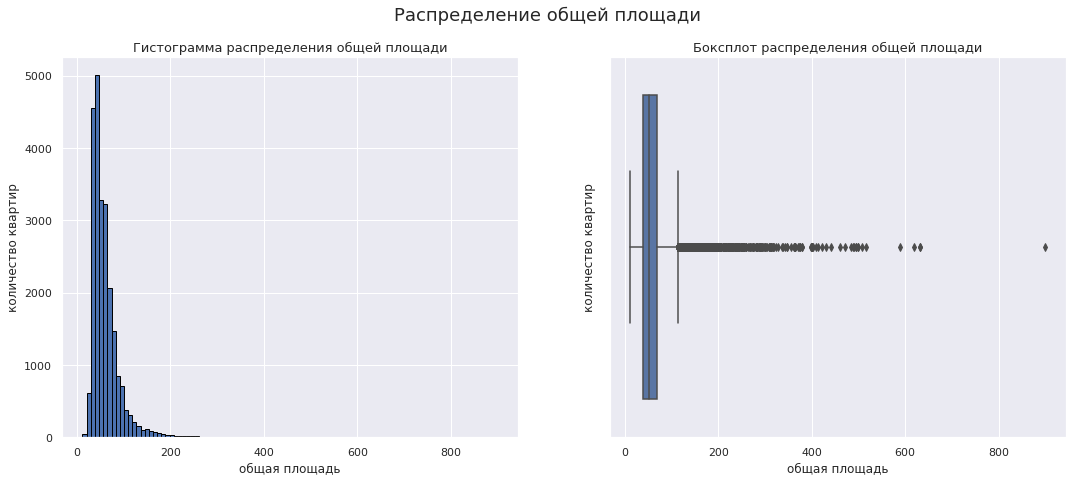

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(18,7))
plt.suptitle('Распределение общей площади', size=18)

#Построение гистограммы
df['total_area'].hist(bins=100, edgecolor='black', ax=axs[0])
axs[0].set_title('Гистограмма распределения общей площади', size=13)
axs[0].set_xlabel('общая площадь')
axs[0].set_ylabel('количество квартир')

#Построение боксплота
sns.boxplot(x='total_area', data=df, ax=axs[1])
axs[1].set_title('Боксплот распределения общей площади', size=13)
axs[1].set_xlabel('общая площадь')
axs[1].set_ylabel('количество квартир')

plt.show()


In [36]:
df['total_area'].describe()

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

Из гистограммы распределения общей площади видно, что в датасете преобладает количество квартир (около 5000) с общей площадью в районе 60 кв.м. Наша гистограмма имеет "длинный хвост", который означает, что в выборке реже всего встречаются квартиры с общей площадью больше 200 кв.м. Если рассматривать диагамму размаха, то видно, что выбросами у нас являются площади квартир больше 100 кв.м., а  наиболее редкие значения площади находятся в диапазоне 300 - 500 кв.м.,площади 500 - 900 кв.м. можно считать аномалиям. 

<div class="alert alert-block alert-success">
<b>Success:</b> отличное применение диаграммы размаха

**Распределение отношения жилой площади к общей площади**

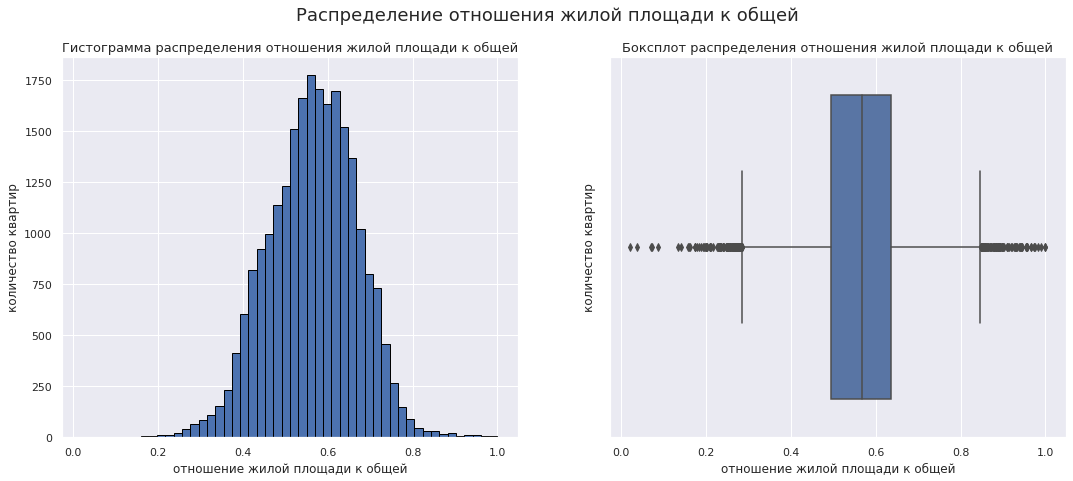

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(18,7))
plt.suptitle('Распределение отношения жилой площади к общей', size=18)

#Построение гистограммы
df['ratio_living_total'].hist(bins=50, edgecolor='black', ax=axs[0])
axs[0].set_title('Гистограмма распределения отношения жилой площади к общей', size=13)
axs[0].set_xlabel('отношение жилой площади к общей')
axs[0].set_ylabel('количество квартир')

#Построение боксплота
sns.boxplot(x='ratio_living_total', data=df, ax=axs[1])
axs[1].set_title('Боксплот распределения отношения жилой площади к общей', size=13)
axs[1].set_xlabel('отношение жилой площади к общей')
axs[1].set_ylabel('количество квартир')

plt.show()


Получившаяся гистограмма симметрична и напоминает колокол, из чего можно сделать вывод, что мы получили распределение, тяготеющее к нормальному. Наиболее часто встречающимися соотношениями жилой площади к общей площади квартиры являются соотношения в диапазоне 0.5-0.65. Значения меньше 0.3 и больше 0.85 считаются выбросами. В первом случае можно сказать, что жилая площадь гораздо меньше площади квартиры, во втором же - площадь жилой площади слишком большая и стремится к площади квартиры. Настораживают значения, равные 1: здесь жилая площадь равна площади квартиры. Можно было бы предположить, что такое возможно, если квартира заявлена как студия, но после выведения значений, равных 1, мы видим, что эти квартиры не студии.

In [38]:
display(df[df['ratio_living_total']==1])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter2,price_per_m_group,is_apartment1,dayweek,month,year,floor_category,ratio_living_total,ratio_kitchen_total
9861,10,2350000.0,25.0,2017-12-03,0,2.775,22,25.0,17,False,False,True,NaN,10,посёлок Мурино,NaN,NaN,10,NaN,10,NaN,13,94000.000,эконом,NaN,Sunday,12,2017,другой этаж,1.0,NaN
12691,1,3700000.0,24.2,2017-11-10,0,2.750,19,24.2,13,False,False,True,NaN,1,Санкт-Петербург,17837.0,16840.0,1,NaN,1,210.0,74,152892.562,люкс,NaN,Friday,11,2017,другой этаж,1.0,NaN


**Распределение отношения площади кухни к общей площади**

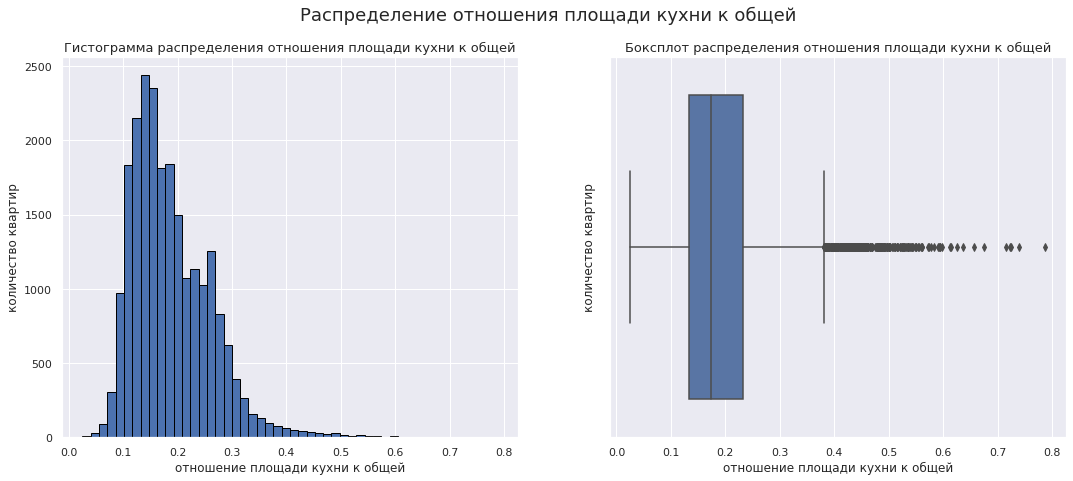

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(18,7))
plt.suptitle('Распределение отношения площади кухни к общей', size=18)

#Построение гистограммы
df['ratio_kitchen_total'].hist(bins=50, edgecolor='black', ax=axs[0])
axs[0].set_title('Гистограмма распределения отношения площади кухни к общей', size=13)
axs[0].set_xlabel('отношение площади кухни к общей')
axs[0].set_ylabel('количество квартир')

#Построение боксплота
sns.boxplot(x='ratio_kitchen_total', data=df, ax=axs[1])
axs[1].set_title('Боксплот распределения отношения площади кухни к общей', size=13)
axs[1].set_xlabel('отношение площади кухни к общей')
axs[1].set_ylabel('количество квартир')

plt.show()

После построения гистограммы мы видим, что она смещена влево, а с увеличением числа событий становится симметричной и уходит вправо. Имеем форму распределения Пуассона с длинным хвостом. Наиболее часто встречающимися значениями отношения площади кухни ко всей площади квартиры являются значения в диапазоне 0.14-0.24, значения свыше 0.38 являются выбросами, что логично: если площадь кухни занимает больше 60% квартиры - это весьма подозрительно (либо это студия, либо ошибка в данных).

**Цена**

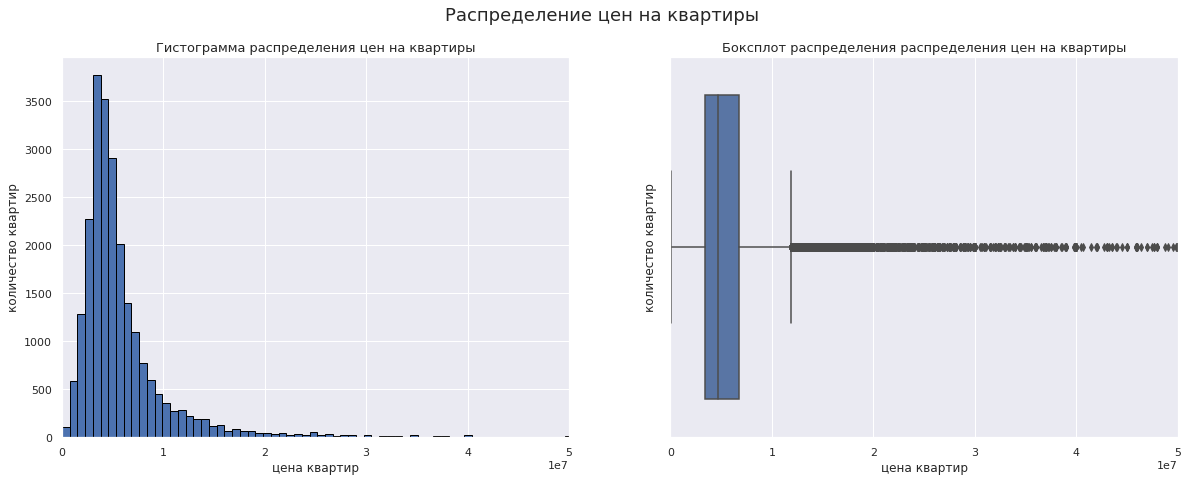

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(20,7))
plt.suptitle('Распределение цен на квартиры', size=18)


#Построение гистограммы
df['last_price'].hist(bins=1000, edgecolor='black', ax=axs[0])
axs[0].set_title('Гистограмма распределения цен на квартиры', size=13)
axs[0].set_xlabel('цена квартир')
axs[0].set_ylabel('количество квартир')
axs[0].set_xlim(0, 0.5e8)

#Построение боксплота
sns.boxplot(x='last_price', data=df, ax=axs[1])
axs[1].set_title('Боксплот распределения распределения цен на квартиры', size=13)
axs[1].set_xlabel('цена квартир')
axs[1].set_ylabel('количество квартир')
axs[1].set_xlim(0, 0.5e8)

plt.show()

Гистограмма распределения цен на квартиры смещена влево, распределение схоже с Пуассоновским, наиболее часто встречающиеся квартиры - квартиры с ценой около 4.7 млн.руб. Квартиры со стоимостью свыше 15 млн. руб. отображаются на диаграмме размаха как выбросы.

**Число комнат**

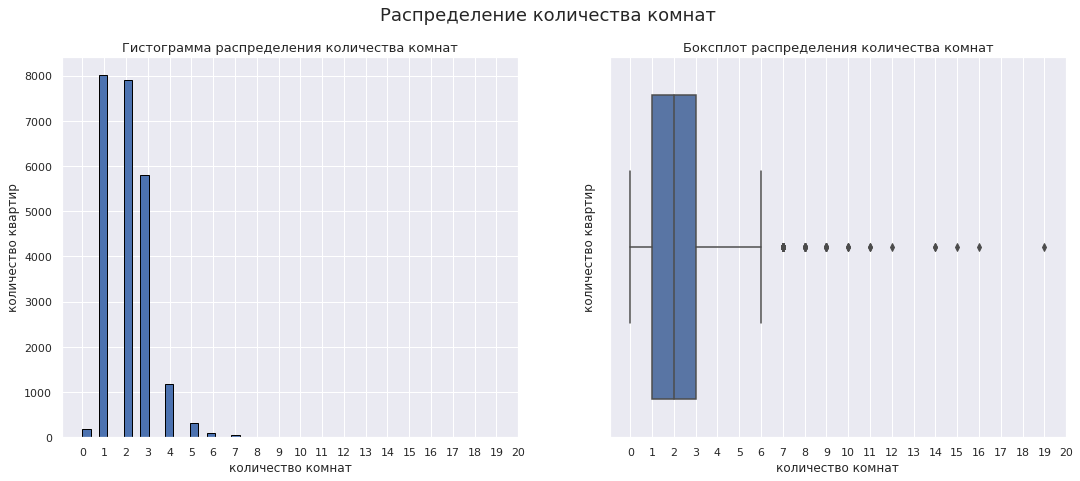

In [41]:
df['rooms'] = df['rooms'].astype('int')
fig, axs = plt.subplots(1, 2, figsize=(18,7))
plt.suptitle('Распределение количества комнат', size=18)

#Построение гистограммы
df['rooms'].hist(bins=50, edgecolor='black', ax=axs[0])
axs[0].set_title('Гистограмма распределения количества комнат', size=13)
axs[0].set_xlabel('количество комнат')
axs[0].set_ylabel('количество квартир')
axs[0].set_xticks(list(range(0, 21)))

#Построение боксплота
sns.boxplot(x='rooms', data=df, ax=axs[1])
axs[1].set_title('Боксплот распределения количества комнат', size=13)
axs[1].set_xlabel('количество комнат')
axs[1].set_ylabel('количество квартир')
axs[1].set_xticks(list(range(0, 21)))

plt.show()

Наиболее часто в нашей выборке встречаются 1,2-комнатные квартиры. Нормальными считаются квартиры в диапазоне 1-6 комнатные. Все остальные квартиры - это выбросы. Встречаются также квартиры без комнат, это артефакты, которые в дальнейшем подлежат удалению.

**Высота потолков**

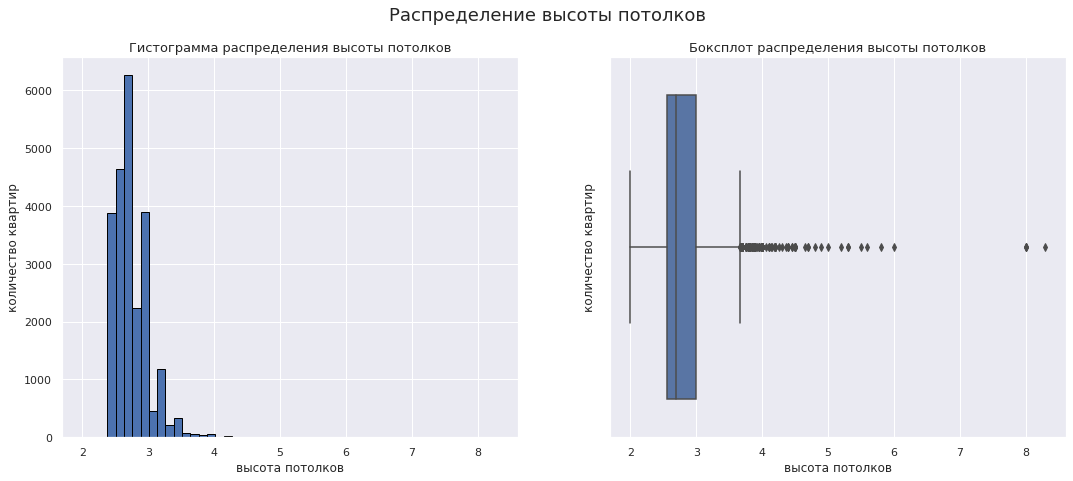

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(18,7))
plt.suptitle('Распределение высоты потолков', size=18)

#Построение гистограммы
df['ceiling_height'].hist(bins=50, edgecolor='black', ax=axs[0])
axs[0].set_title('Гистограмма распределения высоты потолков', size=13)
axs[0].set_xlabel('высота потолков')
axs[0].set_ylabel('количество квартир')

#Построение боксплота
sns.boxplot(x='ceiling_height', data=df, ax=axs[1])
axs[1].set_title('Боксплот распределения высоты потолков', size=13)
axs[1].set_xlabel('высота потолков')
axs[1].set_ylabel('количество квартир')

plt.show()

Наиболее распространенными квартирами являются квартиры с высотой потолков около 2.7 м. Наиболее нормальными значениями являются значения высоты потолков на диаграмме размаха в диапазоне 2-3.7 м. Все значения свыше 3.7 м являются выбросами. 

**Изучение времени продажи квартиры. Построение гистограммы. Подсчет среднего и медианы.**

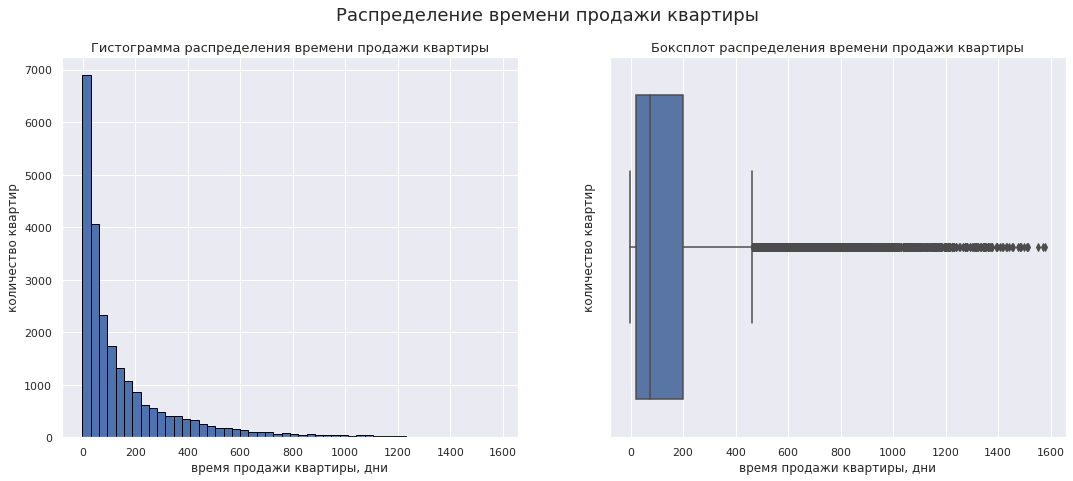

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(18,7))
plt.suptitle('Распределение времени продажи квартиры', size=18)

#Построение гистограммы
df['days_exposition'].hist(bins=50, edgecolor='black', ax=axs[0])
axs[0].set_title('Гистограмма распределения времени продажи квартиры', size=13)
axs[0].set_xlabel('время продажи квартиры, дни')
axs[0].set_ylabel('количество квартир')

#Построение боксплота
sns.boxplot(x='days_exposition', data=df, ax=axs[1])
axs[1].set_title('Боксплот распределения времени продажи квартиры', size=13)
axs[1].set_xlabel('время продажи квартиры, дни')
axs[1].set_ylabel('количество квартир')

plt.show()


Обычно продажа квартиры занимает от 5 до 420 дней. Чаще всего квартира продается за 30 дней. Все значения свыше 450 дней являются выбросами. 

In [44]:
print("Среднее время продажи квартиры: {:.2f} дней".format(df[df['days_exposition'] > -1]['days_exposition'].mean()))
print("Медиана времени продажи квартиры: {:.2f} дней".format(df[df['days_exposition'] > -1]['days_exposition'].median()))

Среднее время продажи квартиры: 180.88 дней
Медиана времени продажи квартиры: 95.00 дней


Получили, что среднее время продажи квартиры составляет 181 день, а медиана времени продажи квартиры 95 дней.

In [45]:
df[df['days_exposition'] > -1]['days_exposition'].describe()

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Минимальное значение дней - 1 день квартира висела на доске объявлений. Когда продажа квартиры заняла меньше 5 дней, можно считать, что продажа прошла очень быстро, напротив, все значения больше 1500 дней (что составляет примерно 4 года) можно считать необычайно долгими продажами.

 **Удаление редких и выбивающихсяя значений.**

In [46]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest,days_exposition,price_per_meter2,month,year,ratio_living_total,ratio_kitchen_total
count,23613.000000,2.361300e+04,23613.000000,23613.000000,23387.000000,23613.000000,23414.000000,23613.000000,22702.000000,18081.000000,18104.000000,8045.000000,9061.000000,23613.000000,2.361300e+04,23613.000000,23613.000000,23414.000000,22702.000000
mean,9.874518,6.540555e+06,60.340678,2.071147,2.764032,10.673824,34.341617,5.877313,10.511612,28788.008185,14185.084015,490.554630,518.209469,156.451743,9.939748e+04,6.400076,2017.368102,0.564774,0.187324
std,5.681541,1.090172e+07,35.648988,1.078380,0.266493,6.597173,21.737382,4.873539,5.845836,12626.209956,8614.132292,341.336698,277.887489,213.601326,5.035802e+04,3.493160,1.039383,0.104074,0.072397
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,181.000000,1.000000,13.000000,-1.000000,1.118350e+02,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.400000e+06,40.000000,1.000000,2.560000,5.000000,18.600000,2.000000,7.000000,18575.000000,9233.750000,288.000000,294.000000,22.000000,7.656250e+04,3.000000,2017.000000,0.495797,0.133333
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,26726.000000,13093.000000,455.000000,503.000000,73.000000,9.500000e+04,6.000000,2017.000000,0.568182,0.172740
75%,14.000000,6.799000e+06,69.800000,3.000000,3.000000,16.000000,42.200000,8.000000,12.000000,37242.000000,16287.000000,612.000000,730.000000,199.000000,1.142061e+05,10.000000,2018.000000,0.636364,0.232558
max,50.000000,7.630000e+08,900.000000,19.000000,8.300000,60.000000,409.700000,33.000000,112.000000,84869.000000,65968.000000,3190.000000,1344.000000,1580.000000,1.907500e+06,12.000000,2019.000000,1.000000,0.787879


Построим графики для того чтобы нагляднее увидеть выбросы и удалить редкие и выбивающиеся значения.

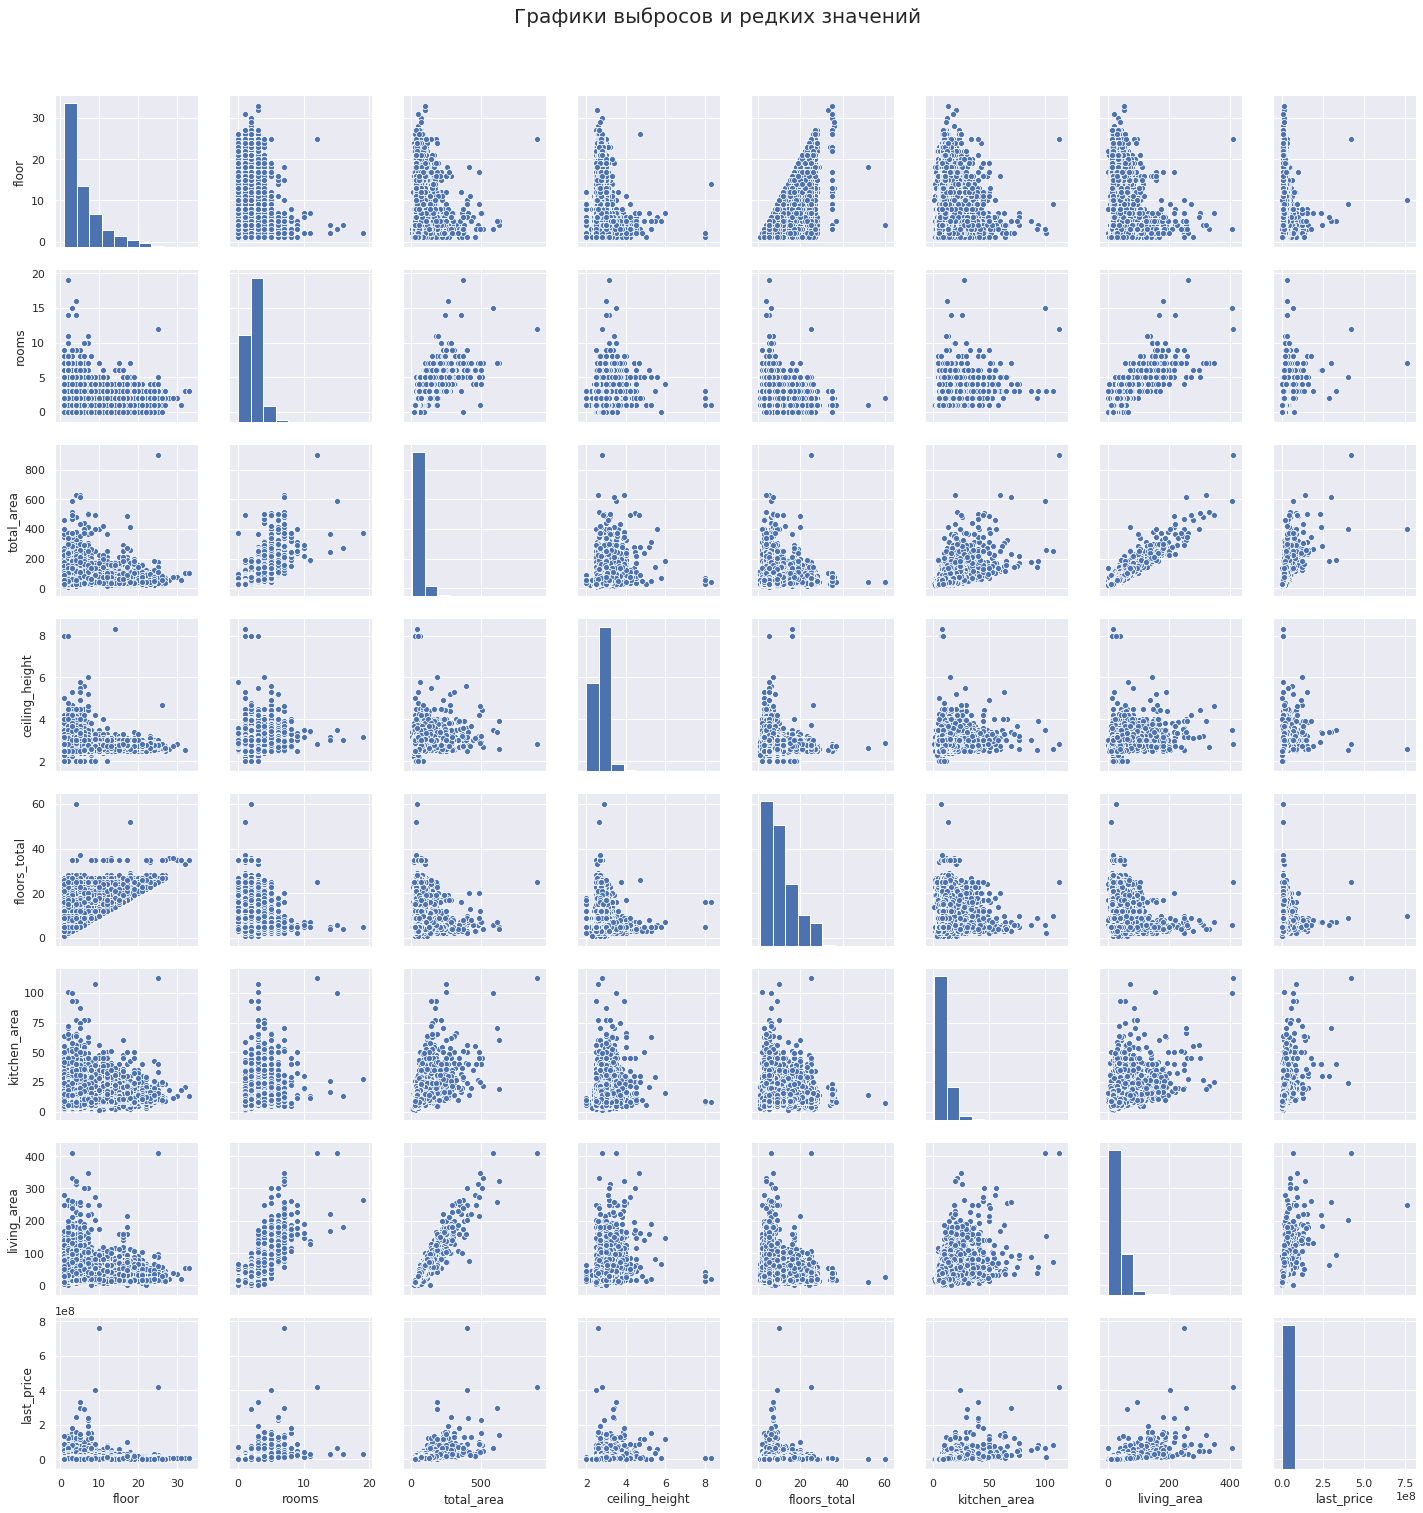

In [47]:
g = sns.pairplot(df[['floor', 'rooms', 'total_area', 'ceiling_height', 
                 'floors_total', 'kitchen_area', 'living_area', 'last_price' ]])
g.fig.suptitle("Графики выбросов и редких значений", y=1.05, size=20)
plt.show()

<div class="alert alert-block alert-success">
Молодец, что разобралась с парметрами!

*Вопрос к ревьюеру:<br>*
Как добавить заголовок к этому графику? Через plt.title не получилось :(    

<div class="alert alert-block alert-warning">

```python
g = sns.pairplot(df[['floor', 'rooms', 'total_area', 'ceiling_height', 
                 'floors_total', 'kitchen_area', 'living_area', 'last_price' ]])
g.fig.suptitle("Your Title", y=1.08)
plt.show()
```

<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Спасибо! :)
</div>

In [48]:
indexNames = df[(df['rooms']>15) | (df['rooms']==0)| (df['total_area']>500) | (df['total_area']<15) | (df['ceiling_height']>6)| (df['floors_total']>40) 
           | (df['kitchen_area']>100) | (df['living_area']>400) | (df['last_price']>75000000)].index
df.drop(indexNames, inplace=True)

Построив графики с выбросами мы обнаружили, что в датасете имеются квартиры с количеством комнат 0, что некорректно, также удалены строчки с количеством комнат больше 15. Квартир с площадью больше 500 кв.м в Санкт-Петербурге нет в принципе, как и меньше 15 кв.м, удалены квартиры с жилой площадью больше 400 кв.м. и квартиры с кухней больше 100 кв.м. Также удалены строки, со значением потолков больше 6 м и квартиры с ценой выше 75 000 000 руб.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23335 entries, 0 to 23698
Data columns (total 31 columns):
total_images            23335 non-null int64
last_price              23335 non-null float64
total_area              23335 non-null float64
first_day_exposition    23335 non-null datetime64[ns]
rooms                   23335 non-null int64
ceiling_height          23110 non-null float64
floors_total            23335 non-null int64
living_area             23146 non-null float64
floor                   23335 non-null int64
is_apartment            23335 non-null bool
studio                  23335 non-null bool
open_plan               23335 non-null bool
kitchen_area            22633 non-null float64
balcony                 23335 non-null category
locality_name           23287 non-null category
airports_nearest        17884 non-null float64
cityCenters_nearest     17905 non-null float64
parks_around3000        23335 non-null category
parks_nearest           7957 non-null float64
ponds_

**Факторы больше всего влияющие на стоимость квартиры. Изучение того, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Изучение зависимости от даты размещения: дня недели, месяца и года.**


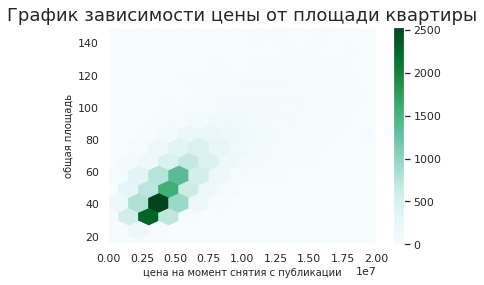

In [50]:
df.plot(x='last_price', y='total_area', kind='hexbin', figsize=(6,4), gridsize=50, sharex=False, grid=True)
plt.xlim(0, 2e7)
plt.ylim(15,  150)
plt.xlabel('цена на момент снятия с публикации', size=10)
plt.ylabel('общая площадь', size=10)
plt.title('График зависимости цены от площади квартиры', size=18)
plt.show()

Из графика зависимости цены от площади квартиры видно, что наибольшее количество квартир, которые представлены на доске объявлений имеют общую площадь примерно 40 кв.м и цену в районе 2.5 млн.руб

Наибольшее количество квартир, которые представлены на доске обявлений имеют общую площадь примерно 40 кв.м и цену в районе 2.5 млн.руб.
Из построенного графика видим, что наибольшее количество квартир имеет стоимость меньше 10 млн.руб и их площадь составляет меньше 100 кв.м. Из графика по расположению точек можно увидеть зависимость стоимости квартиры от ее площади. И тем не менее, по выбросам можно сказать, что не всегда квартиры с самой большой площадью являются самыми дорогими.

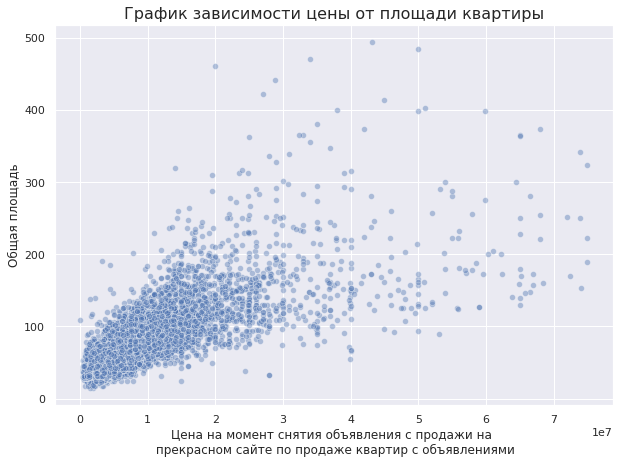

In [51]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='last_price', y='total_area', alpha=0.4)
plt.title('График зависимости цены от площади квартиры', size=16)
plt.xlabel('Цена на момент снятия объявления с продажи на \n прекрасном сайте по продаже квартир с объявлениями')
plt.ylabel('Общая площадь')
plt.show()

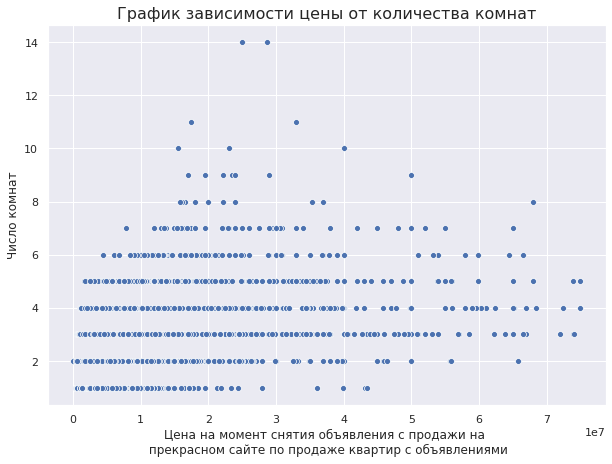

In [52]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='last_price', y='rooms')
plt.title('График зависимости цены от количества комнат', size=16)
plt.xlabel('Цена на момент снятия объявления с продажи на \n прекрасном сайте по продаже квартир с объявлениями')
plt.ylabel('Число комнат')
plt.show()

По постронному графику можно сказать, что в наших данных есть квартиры из сегмента элитного жилья с самой высокой стоимостью, но при этом с маленьким количеством комнат (3-5 комнат). При этом имеются квартиры, имеющие 14 комнат со стоимостью ниже 30 млн.руб.

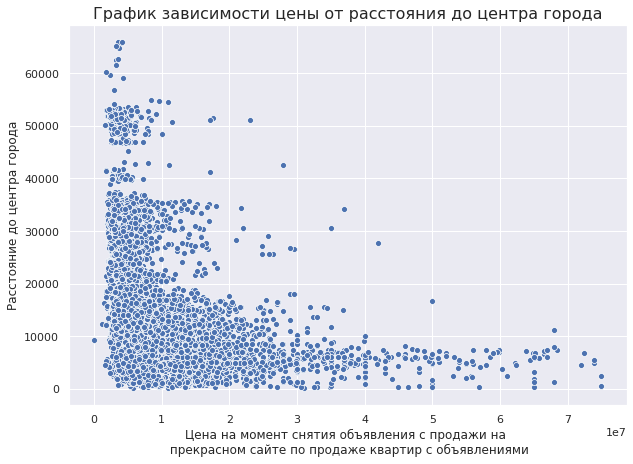

In [53]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='last_price', y='cityCenters_nearest')
plt.title('График зависимости цены от расстояния до центра города', size=16)
plt.xlabel('Цена на момент снятия объявления с продажи на \n прекрасном сайте по продаже квартир с объявлениями')
plt.ylabel('Расстояние до центра города')
plt.show()

По графику зависимости цены от количества комнат можно сказать, что действительно, самие дорогие квартиры расположены ближе к центру, чем остальные. Но при этом дешевых квартир также много ближе к центру города. Поэтому можно сделать вывод, что связь между этими показателями не однозначная.

In [54]:
#Вычислим коэффициенты корреляции
print('Коэффициент корреляции Пирсона цены от площади: {:.2f}'.format(df['last_price'].corr(df['total_area'])))
print('Коэффициент корреляции Пирсона цены от количества комнат: {:.2f}'.format(df['last_price'].corr(df['rooms'])))
print('Коэффициент корреляции Пирсона цены от этажа: {:.2f}'.
      format(df['last_price'].corr(df[(df['floor_category']=='первый этаж')
                                      |(df['floor_category']=='последний этаж')]['floor'])))
print('Коэффициент корреляции Пирсона цены от расстояния до центра города: {:.2f}'.format(df['last_price']
                                                                                              .corr(df['cityCenters_nearest'])))


Коэффициент корреляции Пирсона цены от площади: 0.77
Коэффициент корреляции Пирсона цены от количества комнат: 0.49
Коэффициент корреляции Пирсона цены от этажа: 0.13
Коэффициент корреляции Пирсона цены от расстояния до центра города: -0.31


Рассчитав коэффициенты корреляции, можно сделать вывод, что цена главным образом зависит от площади квартиры: чем больше площадь, тем выше цена на квартиру. Коэффициэнт корреляции Пирсона зависимости стоимости квартиры от количества комнат равен 0.49, что говорит о положительной зависимости, однако не слишком сильной. Чем больше комнат, тем выше цена, однако так бывает не всегда. Зависимость от этажа (первый или последний) присутствует, но не очень сильная. Что касается расстояния до центра города, здесь наблюдается обратно пропорциональная зависимость: чем больше расстояние от центра города, тем цена на квартиру ниже.  

<div class="alert alert-block alert-success">
<b>Success:</b> Отличная аналитика. Видно, что ты можешь успешно анализировать графики и цифры

Построим графики медианных значений цен в зависимости от дня недели, месяца и года.

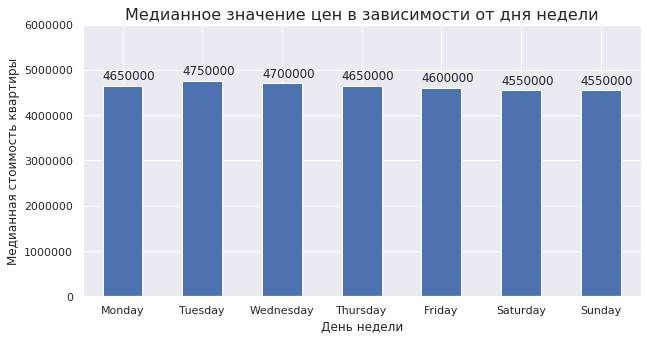

In [55]:
plt.figure(figsize=(10, 5))
plt.title('Медианное значение цен в зависимости от дня недели', size=16)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = df.groupby(df['dayweek'])['last_price'].median().loc[order].plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() * 1, p.get_height() * 1.03))

plt.xlabel('День недели')
plt.ylabel('Медианная стоимость квартиры')
plt.ylim(None, 6e6)
plt.show()

Из графика мы видим, что объявления с наиболее дорогими квартирами были размещены во вторник и среду - 4,75 и 4,7 млн руб соответственно . Напротив, объявления с самыми дешевыми квартирами 4,55 млн. руб. были размещены в выходные дни - субботу и воскресенье. Но в целом медианные значения цен не сильно различаются по дням недели.

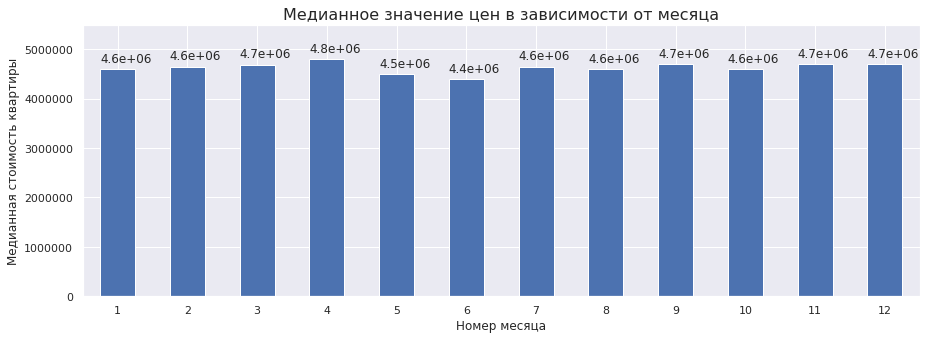

In [56]:
plt.figure(figsize=(15,5))
plt.title('Медианное значение цен в зависимости от месяца', size=16)
ax= df.groupby(df['month'])['last_price'].median().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(str('{:.1e}'.format(round(p.get_height()))), (p.get_x() * 1, p.get_height() * 1.03))
plt.xlabel('Номер месяца')
plt.ylabel('Медианная стоимость квартиры')
plt.ylim(None, 5.5e6)
plt.show()
    

По графику можно сказать, что наиболее высокие медианные значения цен наблюдаются в апреле - 4.8 млн. руб. Самое низкое медианное значение цены - 4.4 млн.руб. наблюдается в июне.

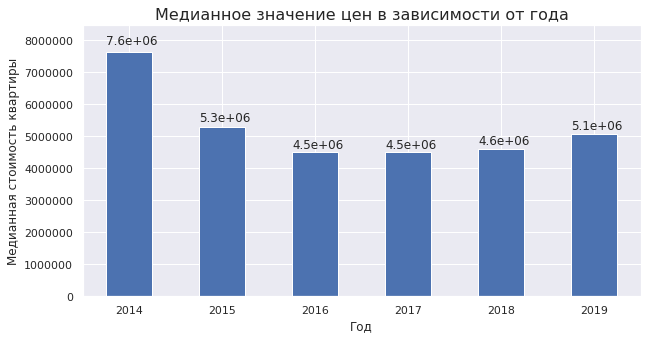

In [57]:
plt.figure(figsize=(10,5))
plt.title('Медианное значение цен в зависимости от года', size=16)
ax= df.groupby(df['year'])['last_price'].median().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(str('{:.1e}'.format(round(p.get_height()))), (p.get_x() * 1, p.get_height() * 1.03))
plt.xlabel('Год')
plt.ylabel('Медианная стоимость квартиры')
plt.ylim(None, 8.5e6)
plt.show()

Самое высокое медианное значение цены находится в 2014 году - 7,6 млн.руб., самое низкое значение наблюдается в 2016 и 2017 году - 4.5 млн. руб.

Проведем группировку данных количества объявлений по дням недели, месяцам и годам для того чтобы оценить, в какие периоды предложение квартир выше.

In [58]:
df.groupby(df['dayweek'])['dayweek'].count()

dayweek
Friday       3923
Monday       3571
Saturday     1900
Sunday       1670
Thursday     4233
Tuesday      4126
Wednesday    3912
Name: dayweek, dtype: int64

Из получившегося результата видим, что наибольшее количество объявлений было размещено в чт и вт - 4233 и 4126 шт. соответственно, напротив, наименьшее количество объявлений наблюдается в выходные дни (сб и вс) - 1900 и 1670 шт соответственно.

In [59]:
df.pivot_table(index = ['year'], columns = 'month', values='last_price', aggfunc=['count'])

count                                                                   \
month     1       2       3      4      5      6      7      8      9      10   
year                                                                            
2014     NaN     NaN     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015    68.0    61.0   111.0   50.0   65.0   94.0   91.0   88.0   90.0  144.0   
2016   121.0   255.0   347.0  415.0  433.0  458.0  139.0   88.0  117.0  122.0   
2017   285.0   433.0   218.0  627.0  544.0  665.0  575.0  730.0  974.0  916.0   
2018   585.0  1315.0  1009.0  300.0  149.0  524.0  859.0  809.0  763.0  908.0   
2019   420.0   549.0   870.0  945.0   61.0    NaN    NaN    NaN    NaN    NaN   

                      
month      11     12  
year                  
2014     20.0  116.0  
2015    155.0  152.0  
2016    132.0  122.0  
2017   1201.0  867.0  
2018    821.0  359.0  
2019      NaN    NaN

Построив сводную таблицу по месяцам и годам мы видим, что наибольшее количество объявлений размещено в феврале 2018 года - 1315 шт. Наименьшее количество - в ноябре 2014 года - 20 шт. Данные же с января 2014 года по октябрь 2014 года и с июня 2019 года по декабрь 2019 года у нас отсутствуют.

In [60]:
df.groupby(df['month'])['month'].count()

month
1     1479
2     2613
3     2555
4     2337
5     1252
6     1741
7     1664
8     1715
9     1944
10    2090
11    2329
12    1616
Name: month, dtype: int64

Больше всего объявлений размещено в феврале месяце (это скорее всего из-зи бума в феврале 2018 года) и в марте. Меньше всего объявлений 1616 люди размещают в декабре месяце, скорее всего из-за приближения новогодних праздников.

In [61]:
df.groupby(df['year'])['year'].count()

year
2014     136
2015    1169
2016    2749
2017    8035
2018    8401
2019    2845
Name: year, dtype: int64

Лидерами по размещению объявлений стали 2017 и 2018 год - 8035 и 8401 шт соответственно. Самым отстающим годом стал 2014 - это произошло из-за отсутсвия информации по некоторым месяцам.

<div class="alert alert-block alert-success">
<b>Success:</b> очень правильное решение - посмотреть, какой объем данных попал в каждую категорию. Это очень сильно влияет на выводы

**10 населённых пунктов с наибольшим числом объявлений. Расчет средней цены квадратного метра в этих населённых пунктах.** 

**Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'. "**

Выведем сводную таблицу, в которой найдем 10 населенных пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населенных пунктах.

In [62]:
pivot_localityname = df.pivot_table(index='locality_name', values='price_per_meter2', aggfunc=['count','mean'])
pivot_localityname.columns = ['count', 'mean'] 
pivot_localityname.sort_values(by=['count', 'mean'], ascending = False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15461,113003.787997
посёлок Мурино,494,85036.645794
посёлок Шушары,435,78277.935549
Всеволожск,392,68618.013727
Пушкин,369,103125.819274
Колпино,338,75424.579098
посёлок Парголово,323,90289.778368
Гатчина,307,68746.146808
деревня Кудрово,283,92297.218841


Лидером по количеству размещенных объявлений стал город Санкт-Петербург. Цены на квартиры в Питере также самые высокие, средняя цена за квадратный метр составляет 113 004 руб. В городе Пушкине тоже наблюдается высокая средняя цена за квадратный метр, которая составляет 103 126 руб. Меньше всего объявлений с продажей квартир в г.Выборге: 237 значений. Самая низкая средняя цена за кв.м 58 142 руб. принадлежит квартирам в г.Выборге.

<div class="alert alert-block alert-success">
<b>Success:</b> хорошо

Выделим сегмент квартир в Санкт-Петербурге, округлим значения расстояния до центра города и рассчитаем среднюю стоимость для каждого километра. Затем построим график градации среднемедианной стоимости жилья в зависимости от расстояния до центра.

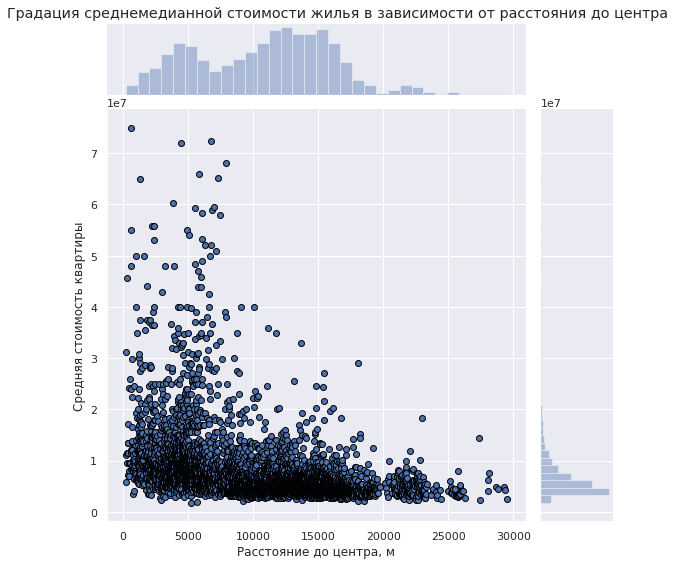

In [63]:
piter_df = df[df['locality_name']=='Санкт-Петербург'].copy(deep=True)
piter_df['cityCenter_rounded'] = piter_df['cityCenters_nearest'].round()
center_data = piter_df.groupby('cityCenter_rounded')['last_price'].median().reset_index().\
              sort_values('cityCenter_rounded')


ax = sns.jointplot(data = center_data, x='cityCenter_rounded', y='last_price', 
                   edgecolor='black', height=8)
ax.fig.suptitle('Градация среднемедианной стоимости жилья в зависимости от расстояния до центра')
ax.set_axis_labels('Расстояние до центра, м', 'Средняя стоимость квартиры', fontsize=12)
# ax.fig.tight_layout()
ax.fig.subplots_adjust(top=0.95)
plt.show()

Из построенного графика видим, что чем дальше от центра располагается квартира, тем ее стоимость ниже. Если посмотреть на сосредоточение квартир по стоимости, видно, что в среднем стоимость квартир находится в диапазоне до 15 млн. руб, после достижения расстояния до центра свыше 15 км, стоимость квартир как правило не превышает 10 млн. Для того чтобы определить центральную зону, проанализируем полученную гистограмму. На ней наблюдаются 2 перегиба:
* 7,5 км 
* 20 км


Допустим точка второго перегиба, а именно 20 км является границей центральной зоны.



<div class="alert alert-block alert-success">
<b>Success:</b> хорошо. Но можно было бы ограничить центр первым перегибом :)

**"Выделение сегмента квартир в центре. Анализ этой территории и изучение следующих параметров: площадь, цена, число комнат, высота потолков. Выделение факторов, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).**

In [64]:
center_df = piter_df[piter_df['cityCenter_rounded'] <= 150000]


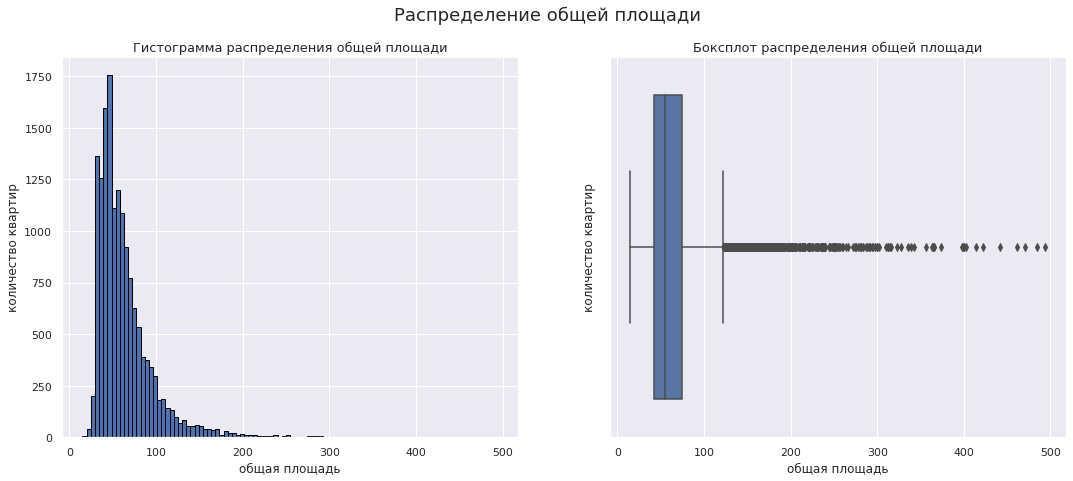

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(18,7))
plt.suptitle('Распределение общей площади', size=18)

#Построение гистограммы
center_df['total_area'].hist(bins=100, edgecolor='black', ax=axs[0])
axs[0].set_title('Гистограмма распределения общей площади', size=13)
axs[0].set_xlabel('общая площадь')
axs[0].set_ylabel('количество квартир')

#Построение боксплота
sns.boxplot(x='total_area', data=center_df, ax=axs[1])
axs[1].set_title('Боксплот распределения общей площади', size=13)
axs[1].set_xlabel('общая площадь')
axs[1].set_ylabel('количество квартир')

plt.show()

Исходя из анализа гистограммы можно сделать вывод, что наибольшее количество квартир - 1750 имеет общую площадь в районе 50  кв. м. По диаграмме размаха можно сказать, что нормальные значения общей площади квартир находятся в диапазоне 20-120 кв.м. Все значения, находящиеся за пределами данного диапазона являются выбросами. Медианное значение составляет около 60 кв.м.

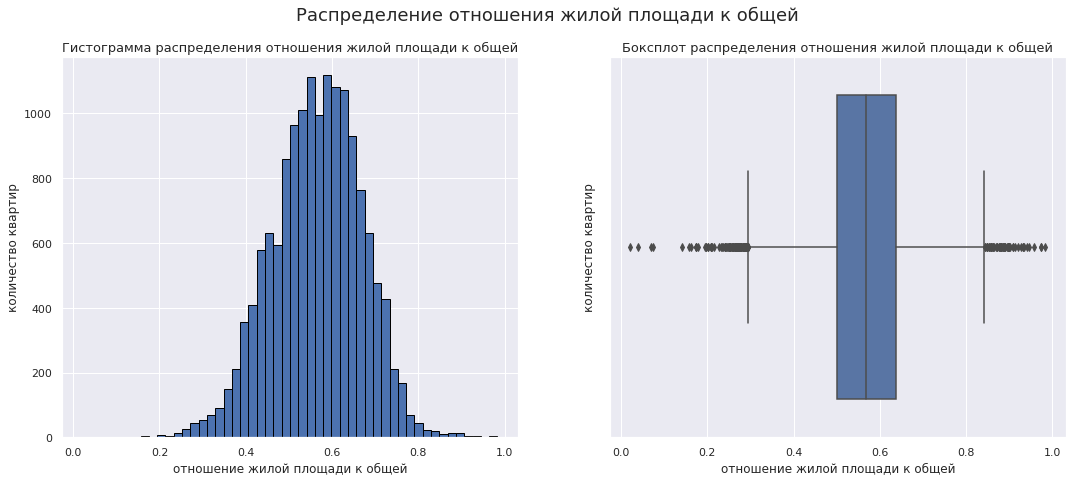

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(18,7))
plt.suptitle('Распределение отношения жилой площади к общей', size=18)

#Построение гистограммы
center_df['ratio_living_total'].hist(bins=50, edgecolor='black', ax=axs[0])
axs[0].set_title('Гистограмма распределения отношения жилой площади к общей', size=13)
axs[0].set_xlabel('отношение жилой площади к общей')
axs[0].set_ylabel('количество квартир')

#Построение боксплота
sns.boxplot(x='ratio_living_total', data=center_df, ax=axs[1])
axs[1].set_title('Боксплот распределения отношения жилой площади к общей', size=13)
axs[1].set_xlabel('отношение жилой площади к общей')
axs[1].set_ylabel('количество квартир')

plt.show()

Наиболее часто встречающееся отношение жилой площади к общей находится в диапазоне 0,5-0,7. Распределение стремится к нормальному, выбросы наблюдаются за пределами диапазона 0,3-0,85, что означает : квартиры с жилой площадью меньше 50% от общей и больше 85% от общей являются выбросами на нашем графике и такая планировка скорее не типична для центра Питера.

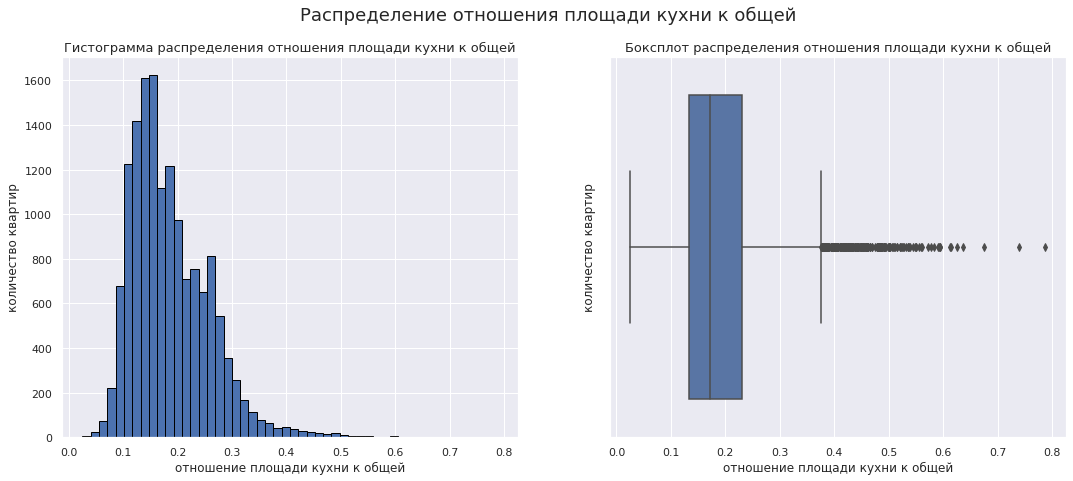

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(18,7))
plt.suptitle('Распределение отношения площади кухни к общей', size=18)

#Построение гистограммы
center_df['ratio_kitchen_total'].hist(bins=50, edgecolor='black', ax=axs[0])
axs[0].set_title('Гистограмма распределения отношения площади кухни к общей', size=13)
axs[0].set_xlabel('отношение площади кухни к общей')
axs[0].set_ylabel('количество квартир')

#Построение боксплота
sns.boxplot(x='ratio_kitchen_total', data=center_df, ax=axs[1])
axs[1].set_title('Боксплот распределения отношения площади кухни к общей', size=13)
axs[1].set_xlabel('отношение площади кухни к общей')
axs[1].set_ylabel('количество квартир')

plt.show()

<div class="alert alert-block alert-warning">
<b>Remarks:</b> можно заметить, что на протяжении всего этого и предыдущего шага мы используем один и тот же фрагмент кода много раз. ПОпробуй автоматизировать эту работу - напши функцию для построения гистограммы и боксплота

Наиболее часто встречающиеся квартиры в центре Питера - квартиры с площадью кухни, составляющей 12% - 20% от общей площади. Нормальными значениями показателя "отношение общей кухни к общей" являются значения, находящиеся в диапазоне 0.3-0.37, все остальные значения - это выбросы, квартир с кухнями , занимающими более 37% от общей площади не очень много.

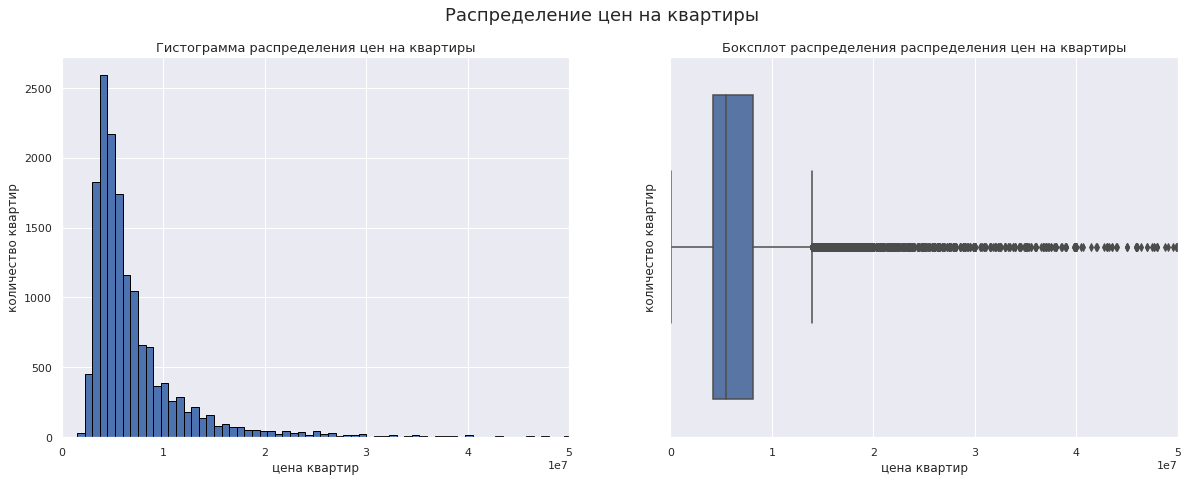

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(20,7))
plt.suptitle('Распределение цен на квартиры', size=18)


#Построение гистограммы
center_df['last_price'].hist(bins=100, edgecolor='black', ax=axs[0])
axs[0].set_title('Гистограмма распределения цен на квартиры', size=13)
axs[0].set_xlabel('цена квартир')
axs[0].set_ylabel('количество квартир')
axs[0].set_xlim(0, 0.5e8)

#Построение боксплота
sns.boxplot(x='last_price', data=center_df, ax=axs[1])
axs[1].set_title('Боксплот распределения распределения цен на квартиры', size=13)
axs[1].set_xlabel('цена квартир')
axs[1].set_ylabel('количество квартир')
axs[1].set_xlim(0, 0.5e8)

plt.show()

Наибольшее количество квартир в центре Питера стоят в районе 4 млн.руб. Цена до 15 млн. руб. является нормальной, все остальные цены -это выбросы и не типичны для центра Питера.

<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Написала функцию для автоматизации построения графиков как пример. Не буду переделывать все графики, чтобы не запутаться. Просто в следующих проектах буду писать функцию вместо построения вручную)
</div>

In [69]:
def plot_subs(feature, suptitle, title1, title2, xlabel1, xlabel2, ylabel1, ylabel2, xticks=None, xlim=None):
    '''
    input:
        feature - название исследуемого признака
        suptitle - название графиков
        title1, title2 - название гистограммы и боксплота
        xlabel1, xlabel2 - название оси x гистограммы и боксплота
        ylabel1, ylabel2 - название оси y гистограммы и боксплота
    output:
        None
    '''
    fig, axs = plt.subplots(1, 2, figsize=(18,7))
    plt.suptitle(suptitle, size=18)

    #Построение гистограммы
    center_df[feature].hist(bins=50, edgecolor='black', ax=axs[0])
    axs[0].set_title(title1, size=13)
    axs[0].set_xlabel(xlabel1)
    axs[0].set_ylabel(ylabel1)


    #Построение боксплота
    sns.boxplot(x=feature, data=center_df, ax=axs[1])
    axs[1].set_title(title2, size=13)
    axs[1].set_xlabel(xlabel2)
    axs[1].set_ylabel(ylabel2)
    
    if xticks is not None:
        axs[0].set_xticks(xticks)
        axs[1].set_xticks(xticks)
    
    if xlim is not None:
        axs[0].set_xlim(xlim)
        axs[1].set_xlim(xlim)
        
    plt.show()    

<div class="alert alert-block alert-success">
Красота! Даже аннотация к функции в докстринге :) Прекрасно :)

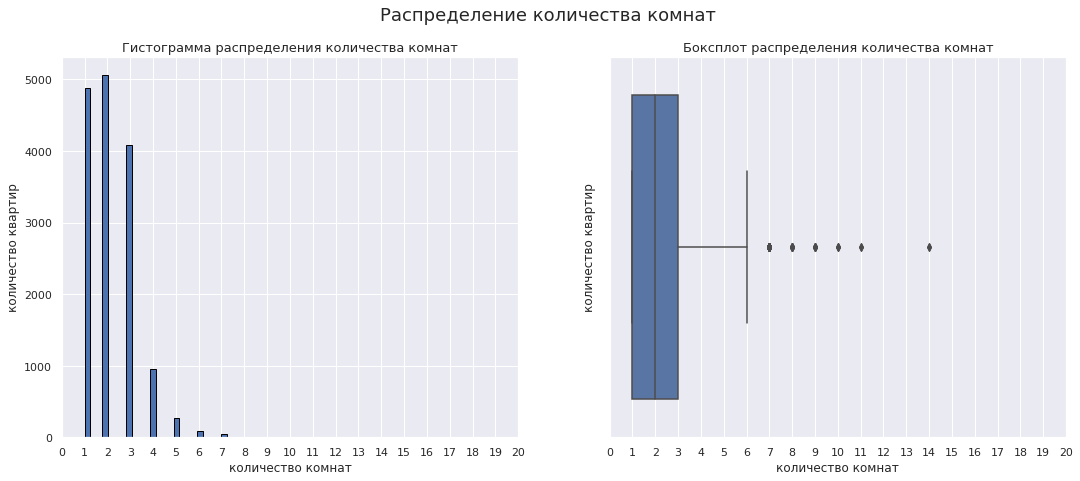

In [70]:
plot_subs('rooms', 'Распределение количества комнат', 
          'Гистограмма распределения количества комнат', 'Боксплот распределения количества комнат',
          'количество комнат', 'количество комнат', 
          'количество квартир', 'количество квартир', 
          xticks=list(range(0, 21)))

In [71]:
# fig, axs = plt.subplots(1, 2, figsize=(18,7))
# plt.suptitle('Распределение количества комнат', size=18)

# #Построение гистограммы
# center_df['rooms'].hist(bins=50, edgecolor='black', ax=axs[0])
# axs[0].set_title('Гистограмма распределения количества комнат', size=13)
# axs[0].set_xlabel('количество комнат')
# axs[0].set_ylabel('количество квартир')
# axs[0].set_xticks(list(range(0, 21)))

# #Построение боксплота
# sns.boxplot(x='rooms', data=center_df, ax=axs[1])
# axs[1].set_title('Боксплот распределения количества комнат', size=13)
# axs[1].set_xlabel('количество комнат')
# axs[1].set_ylabel('количество квартир')
# axs[1].set_xticks(list(range(0, 21)))

# plt.show()

Наибольшее количество объявлений о прадаже квартир в центре Питера являются 1,2,3-х комнатными квартирами, но медианным значением в данном случае выступают двухкомнатные квартиры. Квартиры свыше 6 комнат являются не типичными для центра Питера, это выбросы в нашем датасете.

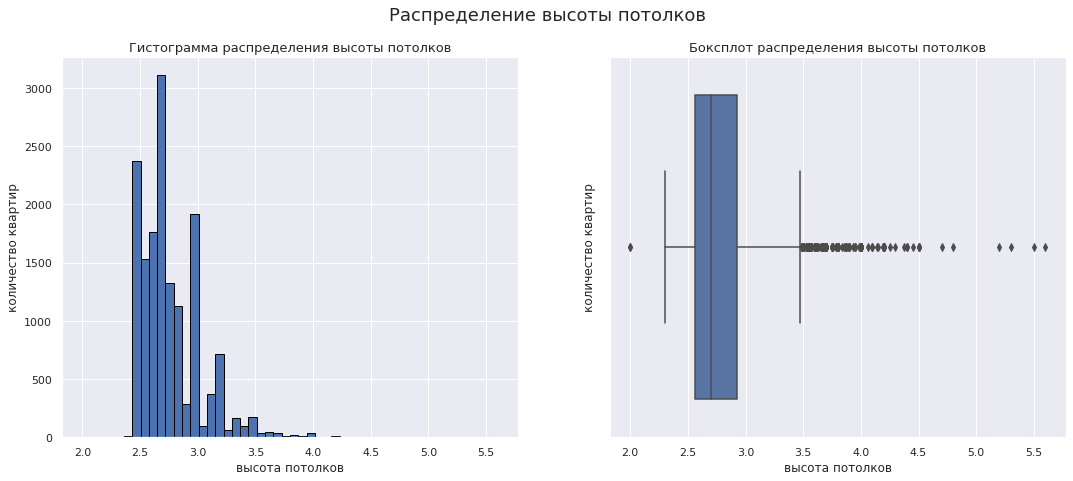

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(18,7))
plt.suptitle('Распределение высоты потолков', size=18)

#Построение гистограммы
center_df['ceiling_height'].hist(bins=50, edgecolor='black', ax=axs[0])
axs[0].set_title('Гистограмма распределения высоты потолков', size=13)
axs[0].set_xlabel('высота потолков')
axs[0].set_ylabel('количество квартир')

#Построение боксплота
sns.boxplot(x='ceiling_height', data=center_df, ax=axs[1])
axs[1].set_title('Боксплот распределения высоты потолков', size=13)
axs[1].set_xlabel('высота потолков')
axs[1].set_ylabel('количество квартир')

plt.show()

Наибольшее количество квартир в центре Питера имеют высоту потолков примерно 2.75 м. Высота в районе 2,3 - 3,5 м является типичной для Питера, все остальные значения, выходящие за рамки данного диапазона являются выбросами.

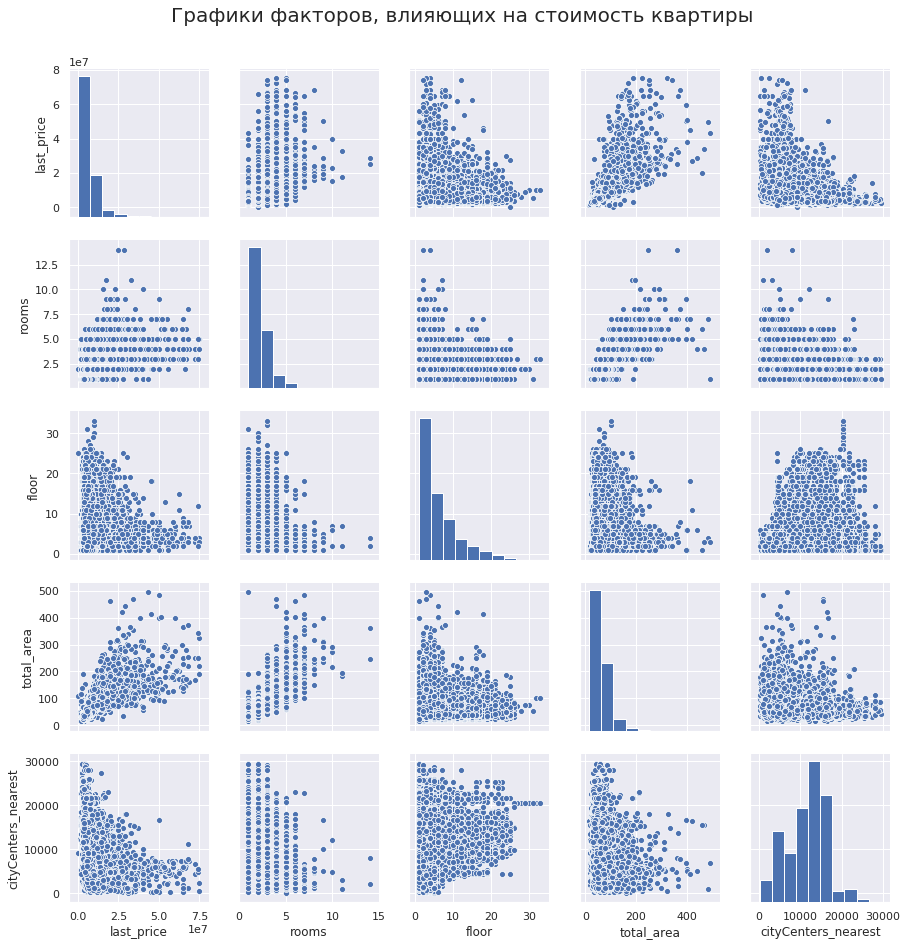

In [73]:
factors= sns.pairplot(center_df[['last_price', 'rooms', 'floor', 'total_area', 'cityCenters_nearest']])
factors.fig.suptitle('Графики факторов, влияющих на стоимость квартиры', y=1.05, size = 20)
plt.show()

По графикам зависимости стоимости квартиры от различных факторов можно сказать: 
- Прямой зависимости цены от количества комнат нет: не всегда квартиры с большим числом комнат самые дорогие. 
- Зависимость стоимости квартиры от этажа состоит в следующем: чем на более низком этаже располагается квартира, тем она,вероятнее всего, дешевле.
- Наблюдается достаточно сильная зависимость между стоимостью квартиры и общей площадью. Чем больше площадь, тем квартира дороже.
- Между стоимостью квартиры и удаленностью ее от центра наблюдается отрицательная зависимость: чем расстояние от центра больше, тем квартира дешевле.

Вычислим коэффициент корреляции зависимости цены от этажа (первый или последний этаж)

In [74]:
print('Коэффициент корреляции Пирсона цены от этажа: {:.2f}'.
      format(center_df['last_price'].corr(center_df[(center_df['floor_category']=='первый этаж')
                                      |(center_df['floor_category']=='последний этаж')]['floor'])))

Коэффициент корреляции Пирсона цены от этажа: 0.09


Из полученного коэффициента корреляции видим, что цена квартиры не зависит от того, располагается она на первом или последнем этаже.

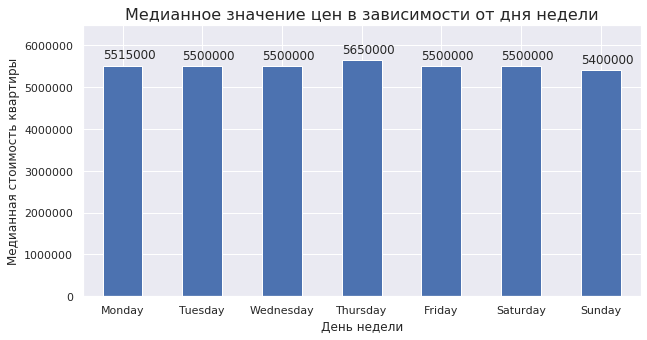

In [75]:
plt.figure(figsize=(10, 5))
plt.title('Медианное значение цен в зависимости от дня недели', size=16)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = center_df.groupby(center_df['dayweek'])['last_price'].median().loc[order].plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() * 1, p.get_height() * 1.03))

plt.xlabel('День недели')
plt.ylabel('Медианная стоимость квартиры')
plt.ylim(None, 6.5e6)
plt.show()

Для того чтобы узнать есть ли зависимость цен на квартиры от дня недели, мы вывели медианные значения цены по каждому дню недели в центре Питера. Получилось, что в чт наблюдаетя самое высокое медианное значение цены 5,65 млн.руб. В воскресенье - самое низкое значение медианной цены - 5.4 млн.руб. Но в целом, цена квартир не сильно зависит от дня недели публикации объявления.

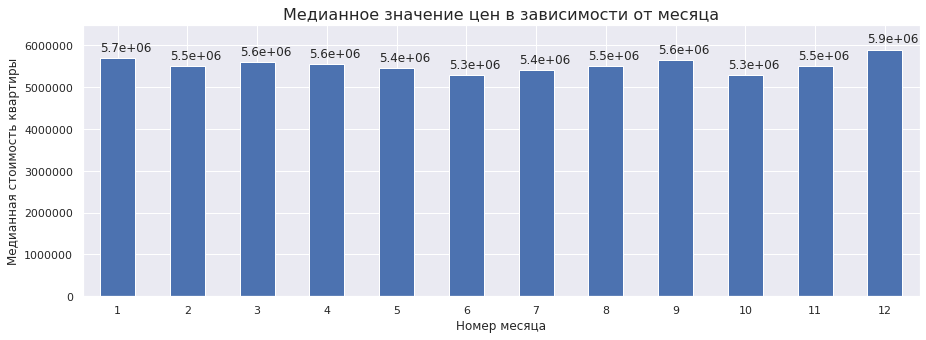

In [76]:
plt.figure(figsize=(15,5))
plt.title('Медианное значение цен в зависимости от месяца', size=16)
ax= center_df.groupby(center_df['month'])['last_price'].median().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(str('{:.1e}'.format(round(p.get_height()))), (p.get_x() * 1, p.get_height() * 1.03))
plt.xlabel('Номер месяца')
plt.ylabel('Медианная стоимость квартиры')
plt.ylim(None, 6.5e6)
plt.show()

По графику медианных значений цен в зависимости от месяца в центре Питера видим, что в декабре наблюдается тенденция к увеличению цен, медианное значение цены 5,9 млн. руб. Самые низкие цены на рынке недвижимости наблюдаются в июне и октябре - 5.3 млн. руб.

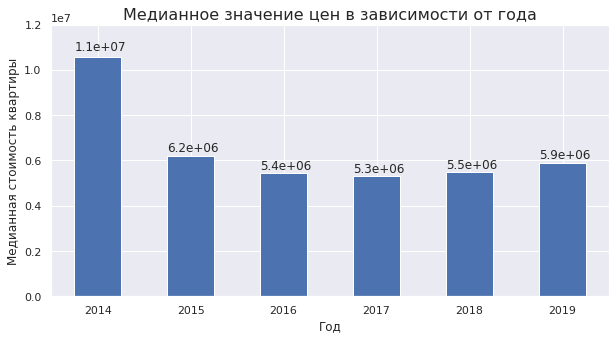

In [77]:
plt.figure(figsize=(10,5))
plt.title('Медианное значение цен в зависимости от года', size=16)
ax= center_df.groupby(center_df['year'])['last_price'].median().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(str('{:.1e}'.format(round(p.get_height()))), (p.get_x() * 1, p.get_height() * 1.03))
plt.xlabel('Год')
plt.ylabel('Медианная стоимость квартиры')
plt.ylim(None, 12e6)
plt.show()

Самый большой всплеск в стоимости квартир наблюдается в 2014 году 11 млн.руб. Можно предположить, что это искажение медианного значения из-за отсутствия данных с января по октябрь 2014. Самое низкое медианное значение цены мы видим в 2017 году - 5.3 млн.руб.

Глобально выводы по центру Питера не сильно отличаются от общих выводов по всему городу. Наибольшее влияние на цены квартир оказывают: площадь квартиры и удаленность от центра. Все остальные факторы (этаж, количество комнат) сильного влияния не оказывают.

### Выводы

Сначала мы проанализировали весь рынок в целом и получили следующие результаты:

- В датасете преобладает количество квартир (около 5000) с общей площадью в районе 60 кв.м. В выборке реже всего встречаются квартиры с общей площадью больше 200 кв.м. Выбросами у нас являются площади квартир больше 100 кв.м., а наиболее редкие значения площади находятся в диапазоне 300 - 500 кв.м.,площади 500 - 900 кв.м. можно считать аномалиями. 
- Наиболее часто встречающимися соотношениями жилой площади к общей площади квартиры являются соотношения в диапазоне 0.5-0.65. Значения меньше 0.3 и больше 0.85 считаются выбросами. В первом случае можно сказать, что жилая площадь гораздо меньше площади квартиры, во втором же - площадь жилой площади слишком большая и стремится к площади квартиры.
- Наиболее часто встречающимися значениями отношения площади кухни ко всей площади квартиры являются значения в диапазоне 0.14-0.24, значения свыше 0.38 являются выбросами, что логично: если площадь кухни занимает больше 60% квартиры - это весьма подозрительно (либо это студия, либо ошибка в данных).
- Наиболее часто встречающиеся квартиры - квартиры с ценой около 4.7 млн.руб. Квартиры со стоимостью свыше 15 млн. руб. отображаются на диаграмме размаха как выбросы.
- Наиболее часто в нашей выборке встречаются 1,2-комнатные квартиры. Нормальными считаются квартиры в диапазоне 1-6 комнатные. Все остальные квартиры - это выбросы. Встречаются также квартиры без комнат, это артефакты, которые в дальнейшем были удалены.
- Наиболее распространенными квартирами являются квартиры с высотой потолков около 2.7 м. Наиболее нормальными значениями являются значения высоты потолков  в диапазоне 2-3.7 м. Все значения свыше 3.7 м являются выбросами. 

Изучили время продажи квартир и получили, что обычно продажа квартиры занимает от 5 до 420 дней. Чаще всего квартира продается за 30 дней. Все значения свыше 450 дней являются выбросами. 
Получили, что среднее время продажи квартиры составляет 181 день, а медиана времени продажи квартиры 95 дней.
Минимальное значение дней - 1 день квартира висела на доске объявлений. Когда продажа квартиры заняла меньше 5 дней, можно считать, что продажа прошла очень быстро, напротив, все значения больше 1500 дней (что составляет примерно 4 года) можно считать необычайно долгими продажами.

Построили графики для того чтобы нагляднее увидеть выбросы и удалить редкие и выбивающиеся значения. Построив графики с выбросами мы обнаружили, что в датасете имеются квартиры с количеством комнат 0, что некорректно, также удалены строчки с количеством комнат больше 15. Квартир с площадью больше 500 кв.м в Санкт-Петербурге нет в принципе, как и меньше 15 кв.м, удалены квартиры с жилой площадью больше 400 кв.м. и квартиры с кухней больше 100 кв.м. Также удалены строки, со значением потолков больше 6 м и квартиры с ценой выше 75 000 000 руб.

Мы вывели факторы, влияющие на стоимость квартиры. 
- Наибольшее количество квартир имеет стоимость меньше 10 млн.руб и их площадь составляет меньше 100 кв.м. Обнаружена зависимость стоимости квартиры от ее площади. И тем не менее, по наличию выбросов можно сказать, что не всегда квартиры с самой большой площадью являются самыми дорогими.
- В наших данных есть квартиры из сегмента элитного жилья с самой высокой стоимостью, но при этом с маленьким количеством комнат (3-5 комнат). При этом имеются квартиры, имеющие 14 комнат со стоимостью ниже 30 млн.руб.
- Действительно, самие дорогие квартиры расположены ближе к центру, чем остальные. Но при этом дешевых квартир также много ближе к центру города. Поэтому можно сделать вывод, что связь между этими показателями не однозначная.
- Цена главным образом зависит от площади квартиры: чем больше площадь, тем выше цена на квартиру. Коэффициэнт корреляции Пирсона зависимости стоимости квартиры от количества комнат равен 0.49, что говорит о положительной зависимости, однако не слишком сильной. Чем больше комнат, тем выше цена, однако так бывает не всегда. Зависимость от этажа (первый или последний) присутствует, но не очень сильная. Что касается расстояния до центра города, здесь наблюдается обратно пропорциональная зависимость: чем больше расстояние от центра города, тем цена на квартиру ниже.  

Построили графики медианных значений цен в зависимости от дня недели, месяца и года и обнаружили:
- Объявления с наиболее дорогими квартирами были размещены во вторник и среду - 4,75 и 4,7 млн руб соответственно . Напротив, объявления с самыми дешевыми квартирами 4,55 млн. руб. были размещены в выходные дни - субботу и воскресенье. Но в целом медианные значения цен не сильно различаются по дням недели.
- наиболее высокие медианные значения цен наблюдаются в апреле - 4.8 млн. руб. Самое низкое медианное значение цены - 4.4 млн.руб. наблюдается в июне.
- Наибольшее количество объявлений было размещено в чт и вт - 4233 и 4126 шт. соответственно, напротив, наименьшее количество объявлений наблюдается в выходные дни (сб и вс) - 1900 и 1670 шт соответственно.
- Наибольшее количество объявлений размещено в феврале 2018 года - 1315 шт. Наименьшее количество - в ноябре 2014 года - 20 шт. Данные же с января 2014 года по октябрь 2014 года и с июня 2019 года по декабрь 2019 года у нас отсутствуют.
- Больше всего объявлений размещено в феврале месяце (это скорее всего из-зи бума в феврале 2018 года) и в марте. Меньше всего объявлений 1616 люди размещают в декабре месяце, скорее всего из-за приближения новогодних праздников.
- Лидерами по размещению объявлений стали 2017 и 2018 год - 8035 и 8401 шт соответственно. Самым отстающим годом стал 2014 - это произошло из-за отсутсвия информации по некоторым месяцам.
- Лидером по количеству размещенных объявлений стал город Санкт-Петербург. Цены на квартиры в Питере также самые высокие, средняя цена за квадратный метр составляет 113 004 руб. В городе Пушкине тоже наблюдается высокая средняя цена за квадратный метр, которая составляет 103 126 руб. Меньше всего объявлений с продажей квартир в г.Выборге: 237 значений. Самая низкая средняя цена за кв.м 58 142 руб. принадлежит квартирам в г.Выборге.

Выделили сегмент квартир в Санкт-Петербурге, округлили значения расстояния до центра города и рассчитали среднюю стоимость для каждого километра. Затем построили график градации среднемедианной стоимости жилья в зависимости от расстояния до центра. Определили, что в среднем стоимость квартир находится в диапазоне до 15 млн. руб, после достижения расстояния до центра свыше 15 км, стоимость квартир как правило не превышает 10 млн. Для того чтобы определить центральную зону, проанализировали полученную гистограмму. На ней наблюдаются 2 перегиба: 7,5 км  и 20 км. Предположили, что точка второго перегиба, а именно 20 км является границей центральной зоны.

Выделили центральную зону Питера и проанализировали предложение квартир в этом сегменте: 
- Наибольшее количество квартир - 1750 имеет общую площадь в районе 50 кв. м. Нормальные значения общей площади квартир находятся в диапазоне 20-120 кв.м. Все значения, находящиеся за пределами данного диапазона являются выбросами. Медианное значение составляет около 60 кв.м.
- Наиболее часто встречающееся отношение жилой площади к общей находится в диапазоне 0,5-0,7. Распределение стремится к нормальному, выбросы наблюдаются за пределами диапазона 0,3-0,85, что означает : квартиры с жилой площадью меньше 50% от общей и больше 85% от общей являются выбросами  и такая планировка скорее не типична для центра Питера.
- Наиболее часто встречающиеся квартиры в центре Питера - квартиры с площадью кухни, составляющей 12% - 20% от общей площади. Нормальными значениями показателя "отношение общей кухни к общей" являются значения, находящиеся в диапазоне 0.3-0.37, все остальные значения - это выбросы, квартир с кухнями , занимающими более 37% от общей площади не очень много.
- Наибольшее количество квартир в центре Питера стоят в районе 4 млн.руб. Цена до 15 млн. руб. является нормальной, все остальные цены -это выбросы и не типичны для центра Питера.
- Наибольшее количество объявлений о прадаже квартир в центре Питера являются 1,2,3-х комнатными квартирами, но медианным значением в данном случае выступают двухкомнатные квартиры. Квартиры свыше 6 комнат являются не типичными для центра Питера, это выбросы в нашем датасете.
- Наибольшее количество квартир в центре Питера имеют высоту потолков примерно 2.75 м. Высота в районе 2,3 - 3,5 м является типичной для Питера, все остальные значения, выходящие за рамки данного диапазона являются выбросами.
- Прямой зависимости цены от количества комнат нет: не всегда квартиры с большим числом комнат самые дорогие. 
- Зависимость стоимости квартиры от этажа состоит в следующем: чем на более низком этаже располагается квартира, тем она,вероятнее всего, дешевле.
- Наблюдается достаточно сильная зависимость между стоимостью квартиры и общей площадью. Чем больше площадь, тем квартира дороже.
- Между стоимостью квартиры и удаленностью ее от центра наблюдается отрицательная зависимость: чем расстояние от центра больше, тем квартира дешевле.
- Цена квартиры не зависит от того, располагается она на первом или последнем этаже.
- Для того чтобы узнать есть ли зависимость цен на квартиры от дня недели, мы вывели медианные значения цены по каждому дню недели в центре Питера. Получилось, что в чт наблюдаетя самое высокое медианное значение цены 5,65 млн.руб. В воскресенье - самое низкое значение медианной цены - 5.4 млн.руб. Но в целом, цена квартир не сильно зависит от дня недели публикации объявления.
- В декабре наблюдается тенденция к увеличению цен, медианное значение цены 5,9 млн. руб. Самые низкие цены на рынке недвижимости наблюдаются в июне и октябре - 5.3 млн. руб.
- Самый большой всплеск в стоимости квартир наблюдается в 2014 году 11 млн.руб. Можно предположить, что это искажение медианного значения из-за отсутствия данных с января по октябрь 2014. Самое низкое медианное значение цены мы видим в 2017 году - 5.3 млн.руб.
- Глобально выводы по центру Питера не сильно отличаются от общих выводов по всему городу. Наибольшее влияние на цены квартир оказывают: площадь квартиры и удаленность от центра. Все остальные факторы (этаж, количество комнат) сильного влияния не оказывают.

### Шаг 5. Общий вывод <a class="anchor" id="step5"></a>

При выводе таблицы обнаружилось, что данные склеены в одну строку, из-за чего информация была нечитаемой, но указав как разделитель знак табуляции: '\t', мы сделали так, что колонки стали разбиваться для комфортного анализа.
Вызвав метод info(), мы увидели данные какого типа содержатся в нашем датасете.


- Мы определили какие существуют пропущенные значения в нашем датасете, заполнили нулями очевидные пропуски: количество балконов, прудов и парков поблизости. 
- Поделили все квартиры на ценовые категории:'нищета и страдание', 'эконом','бизнес', 'люкс', а также определили аномальные значения и определили их в отдельную группу 'золото и жир'.
- Используя группировку по количеству этажей в доме и по цене за квадратный метр мы заполнили пропущенные значения в столбце "высота потолков", исходя из логики, что высота потолков зависит во-первых, от цены квартиры, а во-вторых от этажности дома: высотки имеют более высокие потолки, точно так же как и более дорогие квартиры. Высоту впоследствии пришлось заменять медианой, поскольку были пулучены аномально высокие или аномально низкие значения - меньше 2 м и больше 10 м, что в принципе невозможно в реальной жизни.
- Для того чтобы заполнить пропуски в колонке площадь кухни в квадратных метрах (м²) мы нашли медиану, группируя данные по жилой площади, общей площади и количеству комнат.
- Построив сводную таблицу по имеющимся значениям, чтобы увидеть соотношение апартаментов к не апартаментам мы увидели, что почти по всем ценовым категориям квартир количество апартаментов составляет не более 8%. Предположили, что если нет пометки, что квартира - это апартаменты, то значение равно 0.
- Для того чтобы заполнить пропуски в колонке расстояние до центра города (м) мы нашли медиану, группируя данные по  названию населённого пункта, расстоянию до ближайшего водоёма (м)  и расстоянию до ближайшего парка (м).
- Перевели данные с плавающей точкой в формат int, поскольку в жизни мы не встречаем дробных этажей или комнат, поэтому логичнее перевести данные столбцы в целочисленный формат.
- Поскольку переменная "сколько дней было размещено объявление" независима от других переменных, заполнение пропусков медианой только исказит данные,поэтому было принято решение обозначить пропуски маркером -1, что позволит перевести дни в целочисленный формат.
В итоге мы избавились не от всех пустых значений, но постарались минимизировать пропуски.

Сначала мы проанализировали весь рынок в целом и получили следующие результаты:

- В датасете преобладает количество квартир (около 5000) с общей площадью в районе 60 кв.м. В выборке реже всего встречаются квартиры с общей площадью больше 200 кв.м. Выбросами у нас являются площади квартир больше 100 кв.м., а наиболее редкие значения площади находятся в диапазоне 300 - 500 кв.м.,площади 500 - 900 кв.м. можно считать аномалиями. 
- Наиболее часто встречающимися соотношениями жилой площади к общей площади квартиры являются соотношения в диапазоне 0.5-0.65. Значения меньше 0.3 и больше 0.85 считаются выбросами. В первом случае можно сказать, что жилая площадь гораздо меньше площади квартиры, во втором же - площадь жилой площади слишком большая и стремится к площади квартиры.
- Наиболее часто встречающимися значениями отношения площади кухни ко всей площади квартиры являются значения в диапазоне 0.14-0.24, значения свыше 0.38 являются выбросами, что логично: если площадь кухни занимает больше 60% квартиры - это весьма подозрительно (либо это студия, либо ошибка в данных).
- Наиболее часто встречающиеся квартиры - квартиры с ценой около 4.7 млн.руб. Квартиры со стоимостью свыше 15 млн. руб. отображаются на диаграмме размаха как выбросы.
- Наиболее часто в нашей выборке встречаются 1,2-комнатные квартиры. Нормальными считаются квартиры в диапазоне 1-6 комнатные. Все остальные квартиры - это выбросы. Встречаются также квартиры без комнат, это артефакты, которые в дальнейшем были удалены.
- Наиболее распространенными квартирами являются квартиры с высотой потолков около 2.7 м. Наиболее нормальными значениями являются значения высоты потолков  в диапазоне 2-3.7 м. Все значения свыше 3.7 м являются выбросами. 

Изучили время продажи квартир и получили, что обычно продажа квартиры занимает от 5 до 420 дней. Чаще всего квартира продается за 30 дней. Все значения свыше 450 дней являются выбросами. 
Получили, что среднее время продажи квартиры составляет 181 день, а медиана времени продажи квартиры 95 дней.
Минимальное значение дней - 1 день квартира висела на доске объявлений. Когда продажа квартиры заняла меньше 5 дней, можно считать, что продажа прошла очень быстро, напротив, все значения больше 1500 дней (что составляет примерно 4 года) можно считать необычайно долгими продажами.

Построили графики для того чтобы нагляднее увидеть выбросы и удалить редкие и выбивающиеся значения. Построив графики с выбросами мы обнаружили, что в датасете имеются квартиры с количеством комнат 0, что некорректно, также удалены строчки с количеством комнат больше 15. Квартир с площадью больше 500 кв.м в Санкт-Петербурге нет в принципе, как и меньше 15 кв.м, удалены квартиры с жилой площадью больше 400 кв.м. и квартиры с кухней больше 100 кв.м. Также удалены строки, со значением потолков больше 6 м и квартиры с ценой выше 75 000 000 руб.

Мы вывели факторы, влияющие на стоимость квартиры. 
- Наибольшее количество квартир имеет стоимость меньше 10 млн.руб и их площадь составляет меньше 100 кв.м. Обнаружена зависимость стоимости квартиры от ее площади. И тем не менее, по наличию выбросов можно сказать, что не всегда квартиры с самой большой площадью являются самыми дорогими.
- В наших данных есть квартиры из сегмента элитного жилья с самой высокой стоимостью, но при этом с маленьким количеством комнат (3-5 комнат). При этом имеются квартиры, имеющие 14 комнат со стоимостью ниже 30 млн.руб.
- Действительно, самие дорогие квартиры расположены ближе к центру, чем остальные. Но при этом дешевых квартир также много ближе к центру города. Поэтому можно сделать вывод, что связь между этими показателями не однозначная.
- Цена главным образом зависит от площади квартиры: чем больше площадь, тем выше цена на квартиру. Коэффициэнт корреляции Пирсона зависимости стоимости квартиры от количества комнат равен 0.49, что говорит о положительной зависимости, однако не слишком сильной. Чем больше комнат, тем выше цена, однако так бывает не всегда. Зависимость от этажа (первый или последний) присутствует, но не очень сильная. Что касается расстояния до центра города, здесь наблюдается обратно пропорциональная зависимость: чем больше расстояние от центра города, тем цена на квартиру ниже.  

Построили графики медианных значений цен в зависимости от дня недели, месяца и года и обнаружили:
- Объявления с наиболее дорогими квартирами были размещены во вторник и среду - 4,75 и 4,7 млн руб соответственно . Напротив, объявления с самыми дешевыми квартирами 4,55 млн. руб. были размещены в выходные дни - субботу и воскресенье. Но в целом медианные значения цен не сильно различаются по дням недели.
- наиболее высокие медианные значения цен наблюдаются в апреле - 4.8 млн. руб. Самое низкое медианное значение цены - 4.4 млн.руб. наблюдается в июне.
- Наибольшее количество объявлений было размещено в чт и вт - 4233 и 4126 шт. соответственно, напротив, наименьшее количество объявлений наблюдается в выходные дни (сб и вс) - 1900 и 1670 шт соответственно.
- Наибольшее количество объявлений размещено в феврале 2018 года - 1315 шт. Наименьшее количество - в ноябре 2014 года - 20 шт. Данные же с января 2014 года по октябрь 2014 года и с июня 2019 года по декабрь 2019 года у нас отсутствуют.
- Больше всего объявлений размещено в феврале месяце (это скорее всего из-зи бума в феврале 2018 года) и в марте. Меньше всего объявлений 1616 люди размещают в декабре месяце, скорее всего из-за приближения новогодних праздников.
- Лидерами по размещению объявлений стали 2017 и 2018 год - 8035 и 8401 шт соответственно. Самым отстающим годом стал 2014 - это произошло из-за отсутсвия информации по некоторым месяцам.
- Лидером по количеству размещенных объявлений стал город Санкт-Петербург. Цены на квартиры в Питере также самые высокие, средняя цена за квадратный метр составляет 113 004 руб. В городе Пушкине тоже наблюдается высокая средняя цена за квадратный метр, которая составляет 103 126 руб. Меньше всего объявлений с продажей квартир в г.Выборге: 237 значений. Самая низкая средняя цена за кв.м 58 142 руб. принадлежит квартирам в г.Выборге.

Выделили сегмент квартир в Санкт-Петербурге, округлили значения расстояния до центра города и рассчитали среднюю стоимость для каждого километра. Затем построили график градации среднемедианной стоимости жилья в зависимости от расстояния до центра. Определили, что в среднем стоимость квартир находится в диапазоне до 15 млн. руб, после достижения расстояния до центра свыше 15 км, стоимость квартир как правило не превышает 10 млн. Для того чтобы определить центральную зону, проанализировали полученную гистограмму. На ней наблюдаются 2 перегиба: 7,5 км  и 20 км. Предположили, что точка второго перегиба, а именно 20 км является границей центральной зоны.

Выделили центральную зону Питера и проанализировали предложение квартир в этом сегменте: 
- Наибольшее количество квартир - 1750 имеет общую площадь в районе 50 кв. м. Нормальные значения общей площади квартир находятся в диапазоне 20-120 кв.м. Все значения, находящиеся за пределами данного диапазона являются выбросами. Медианное значение составляет около 60 кв.м.
- Наиболее часто встречающееся отношение жилой площади к общей находится в диапазоне 0,5-0,7. Распределение стремится к нормальному, выбросы наблюдаются за пределами диапазона 0,3-0,85, что означает : квартиры с жилой площадью меньше 50% от общей и больше 85% от общей являются выбросами  и такая планировка скорее не типична для центра Питера.
- Наиболее часто встречающиеся квартиры в центре Питера - квартиры с площадью кухни, составляющей 12% - 20% от общей площади. Нормальными значениями показателя "отношение общей кухни к общей" являются значения, находящиеся в диапазоне 0.3-0.37, все остальные значения - это выбросы, квартир с кухнями , занимающими более 37% от общей площади не очень много.
- Наибольшее количество квартир в центре Питера стоят в районе 4 млн.руб. Цена до 15 млн. руб. является нормальной, все остальные цены -это выбросы и не типичны для центра Питера.
- Наибольшее количество объявлений о прадаже квартир в центре Питера являются 1,2,3-х комнатными квартирами, но медианным значением в данном случае выступают двухкомнатные квартиры. Квартиры свыше 6 комнат являются не типичными для центра Питера, это выбросы в нашем датасете.
- Наибольшее количество квартир в центре Питера имеют высоту потолков примерно 2.75 м. Высота в районе 2,3 - 3,5 м является типичной для Питера, все остальные значения, выходящие за рамки данного диапазона являются выбросами.
- Прямой зависимости цены от количества комнат нет: не всегда квартиры с большим числом комнат самые дорогие. 
- Зависимость стоимости квартиры от этажа состоит в следующем: чем на более низком этаже располагается квартира, тем она,вероятнее всего, дешевле.
- Наблюдается достаточно сильная зависимость между стоимостью квартиры и общей площадью. Чем больше площадь, тем квартира дороже.
- Между стоимостью квартиры и удаленностью ее от центра наблюдается отрицательная зависимость: чем расстояние от центра больше, тем квартира дешевле.
- Цена квартиры не зависит от того, располагается она на первом или последнем этаже.
- Для того чтобы узнать есть ли зависимость цен на квартиры от дня недели, мы вывели медианные значения цены по каждому дню недели в центре Питера. Получилось, что в чт наблюдаетя самое высокое медианное значение цены 5,65 млн.руб. В воскресенье - самое низкое значение медианной цены - 5.4 млн.руб. Но в целом, цена квартир не сильно зависит от дня недели публикации объявления.
- В декабре наблюдается тенденция к увеличению цен, медианное значение цены 5,9 млн. руб. Самые низкие цены на рынке недвижимости наблюдаются в июне и октябре - 5.3 млн. руб.
- Самый большой всплеск в стоимости квартир наблюдается в 2014 году 11 млн.руб. Можно предположить, что это искажение медианного значения из-за отсутствия данных с января по октябрь 2014. Самое низкое медианное значение цены мы видим в 2017 году - 5.3 млн.руб.
- Глобально выводы по центру Питера не сильно отличаются от общих выводов по всему городу. Наибольшее влияние на цены квартир оказывают: площадь квартиры и удаленность от центра. Все остальные факторы (этаж, количество комнат) сильного влияния не оказывают.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод